# Let's Figure out the best process
#### Complete an Explorative Data Analysis
#### Compare a TensorFlow model with a FBProphet model
#### Visualize and Analysis the differences in the models



## Open In Colab (NOT LINKED TO OUR GITHUB)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


# **DengAI: Predicting Disease Spread**

In [1]:
# Source Data
TRAIN_FEATURES_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv"
TRAIN_LABELS_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv"
TEST_FEATURES_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv"

# Explorative Data Analysis


In [2]:
# !pip install --upgrade matplotlib

In [3]:
# !pip install --upgrade seaborn

In [4]:
# !pip install --upgrade numpy

In [5]:
# !pip install --upgrade pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
pd.__version__,np.__version__

('1.0.3', '1.18.2')

#### Set index to [city, year, weekofyear] per the competition instructions
##### maybe we should separate the DataFrames by city **DONE**
##### also we could use an arbitrary index for the modeling and then apply the MultiIndex to the submission data
# Switch index to week_start_date for time-series
## merge features_df and labels_df on current index and then reindex on week_start_date then pop out total_cases for labels

In [8]:
# ,index_col=['city','year','weekofyear']

train_features_df = pd.read_csv(TRAIN_FEATURES_URL,index_col=['city','year','weekofyear'])
train_labels_df = pd.read_csv(TRAIN_LABELS_URL,index_col=['city','year','weekofyear'])
# test_features_df = pd.read_csv(TEST_FEATURES_URL,index_col=['city','year','weekofyear'])

In [9]:
train_features_df.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [10]:
train_features_df.loc[:,'week_start_date'] = train_features_df.loc[:,'week_start_date'].astype('datetime64[ns]')
train_features_df.dtypes

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\IPython\core\interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           float64
reanalysis_tdtr_k                               float64
station_avg_temp_c                              float64
station_diur_temp_rng_c                         

In [11]:
train_labels_df.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [12]:
train_labels_df.dtypes

total_cases    int64
dtype: object

In [13]:
# test_features_df.head()

In [14]:
# test_features_df.dtypes

In [15]:
# Seperate train data for San Juan
sj_train_features = train_features_df.loc['sj']
sj_train_labels = train_labels_df.loc['sj']

# Separate train data for Iquitos
iq_train_features = train_features_df.loc['iq']
iq_train_labels = train_labels_df.loc['iq']

# Seperate test data for San Juan
# sj_test_features = test_features_df.loc['sj']

# Separate test data for Iquitos
# iq_test_features = test_features_df.loc['iq']

In [16]:
print("San Juan number of Features: {}, Labels: {}".format(len(sj_train_features),len(sj_train_labels)))
print("Iquitos number of Features: {}, Labels: {}".format(len(iq_train_features),len(iq_train_labels)))

San Juan number of Features: 936, Labels: 936
Iquitos number of Features: 520, Labels: 520


In [17]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [18]:
sj_train_labels.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

In [19]:
# sj_test_features.head()

In [20]:
iq_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
2000 26              2000-07-01  0.192886  0.132257  0.340886  0.247200   
     27              2000-07-08  0.216833  0.276100  0.289457  0.241657   
     28              2000-07-15  0.176757  0.173129  0.204114  0.128014   
     29              2000-07-22  0.227729  0.145429  0.254200  0.200314   
     30              2000-07-29  0.328643  0.322129  0.254371  0.361043   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2000 26                         25.41             296.740000   
     27                         60.61             296.634286   
     28                         55.52             296.415714   
     29                          5.60             295.357143   
     30                         62.76             296.432857   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
2000 26                     298.450000                   295.184286   
     27                     298.428571                   295.358571   
     28                     297.392857                   295.622857   
     29                     296.228571                   292.797143   
     30                     297.635714                   293.957143   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
2000 26                              307.3  ...   
     27                              306.6  ...   
     28                              304.5  ...   
     29                              303.6  ...   
     30                              307.0  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
2000 26                                    43.19   
     27                                    46.00   
     28                                    64.77   
     29                                    23.96   
     30                                    31.80   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2000 26                                     92.418571   
     27                                     93.581429   
     28                                     95.848571   
     29                                     87.234286   
     30                                     88.161429   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
2000 26                                 25.41   
     27                                 60.61   
     28                                 55.52   
     29                                  5.60   
     30                                 62.76   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
2000 26                                      16.651429           8.928571   
     27                                      16.862857          10.314286   
     28                                      17.120000           7.385714   
     29                                      14.431429           9.114286   
     30                                      15.444286           9.500000   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
2000 26                   26.400000                10.775000   
     27                   26.900000                11.566667   
     28                   26.800000                11.466667   
     29                   25.766667                10.533333   
     30                   26.600000                11.480000   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [21]:
iq_train_labels.head()

total_cases
year weekofyear             
2000 26                    0
     27                    0
     28                    0
     29                    0
     30                    0

In [22]:
# iq_test_features.head()

In [23]:
sj_train_labels.index = sj_train_labels.index.to_flat_index()

In [24]:
sj_train_labels.head()

total_cases
(1990, 18)            4
(1990, 19)            5
(1990, 20)            4
(1990, 21)            3
(1990, 22)            6

In [25]:
sj_train_features.index = sj_train_features.index.to_flat_index()

In [26]:
# sj_test_features.index = sj_test_features.index.to_flat_index()

In [27]:
iq_train_labels.index = iq_train_labels.index.to_flat_index()

In [28]:
iq_train_features.index = iq_train_features.index.to_flat_index()

In [29]:
# iq_test_features.index = iq_test_features.index.to_flat_index()

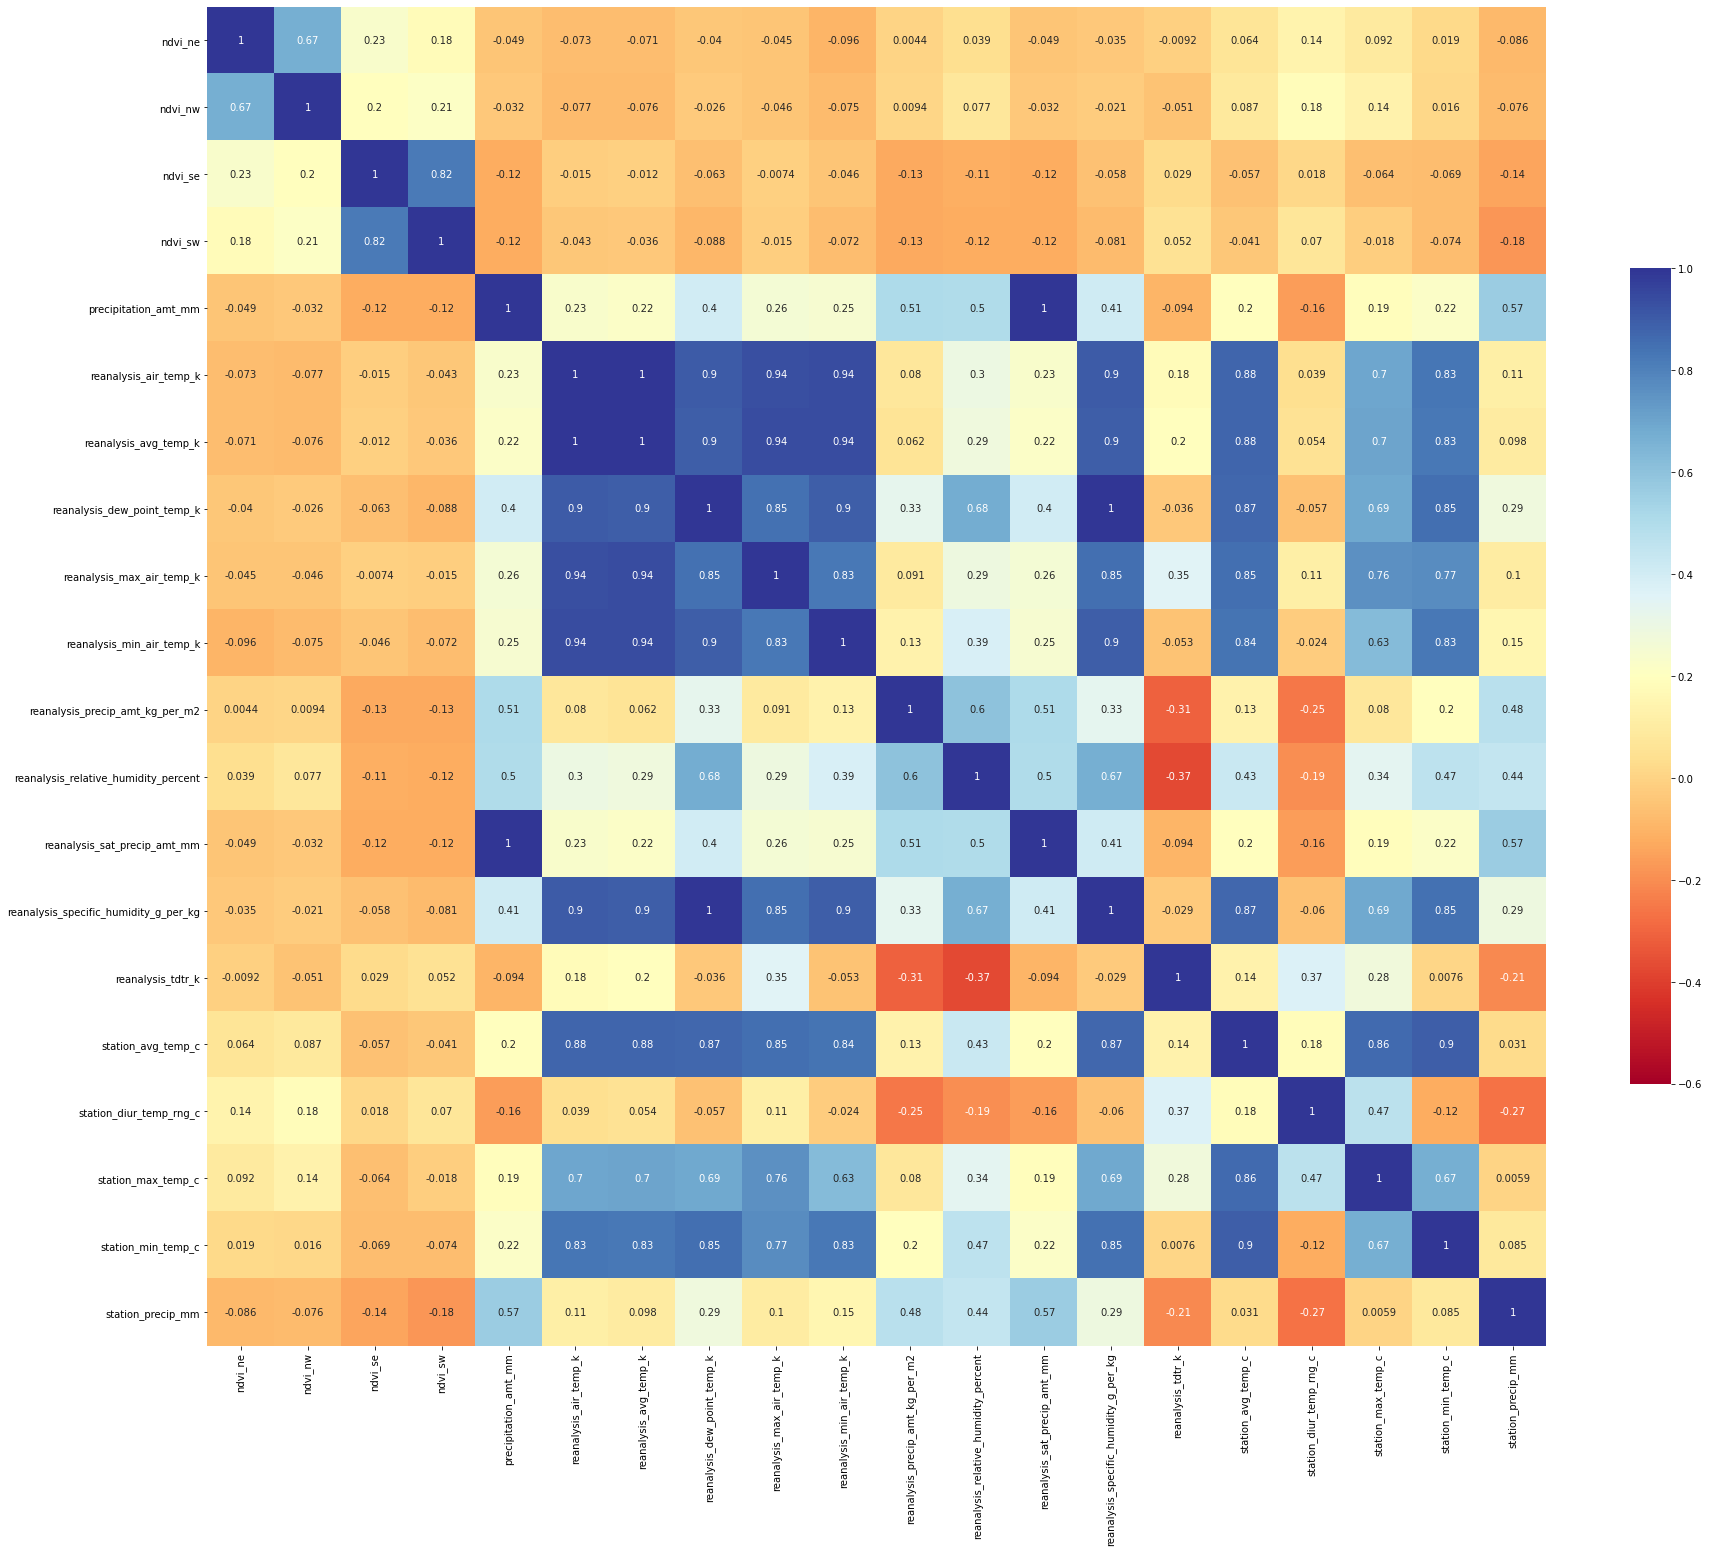

In [30]:
corr = sj_train_features.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

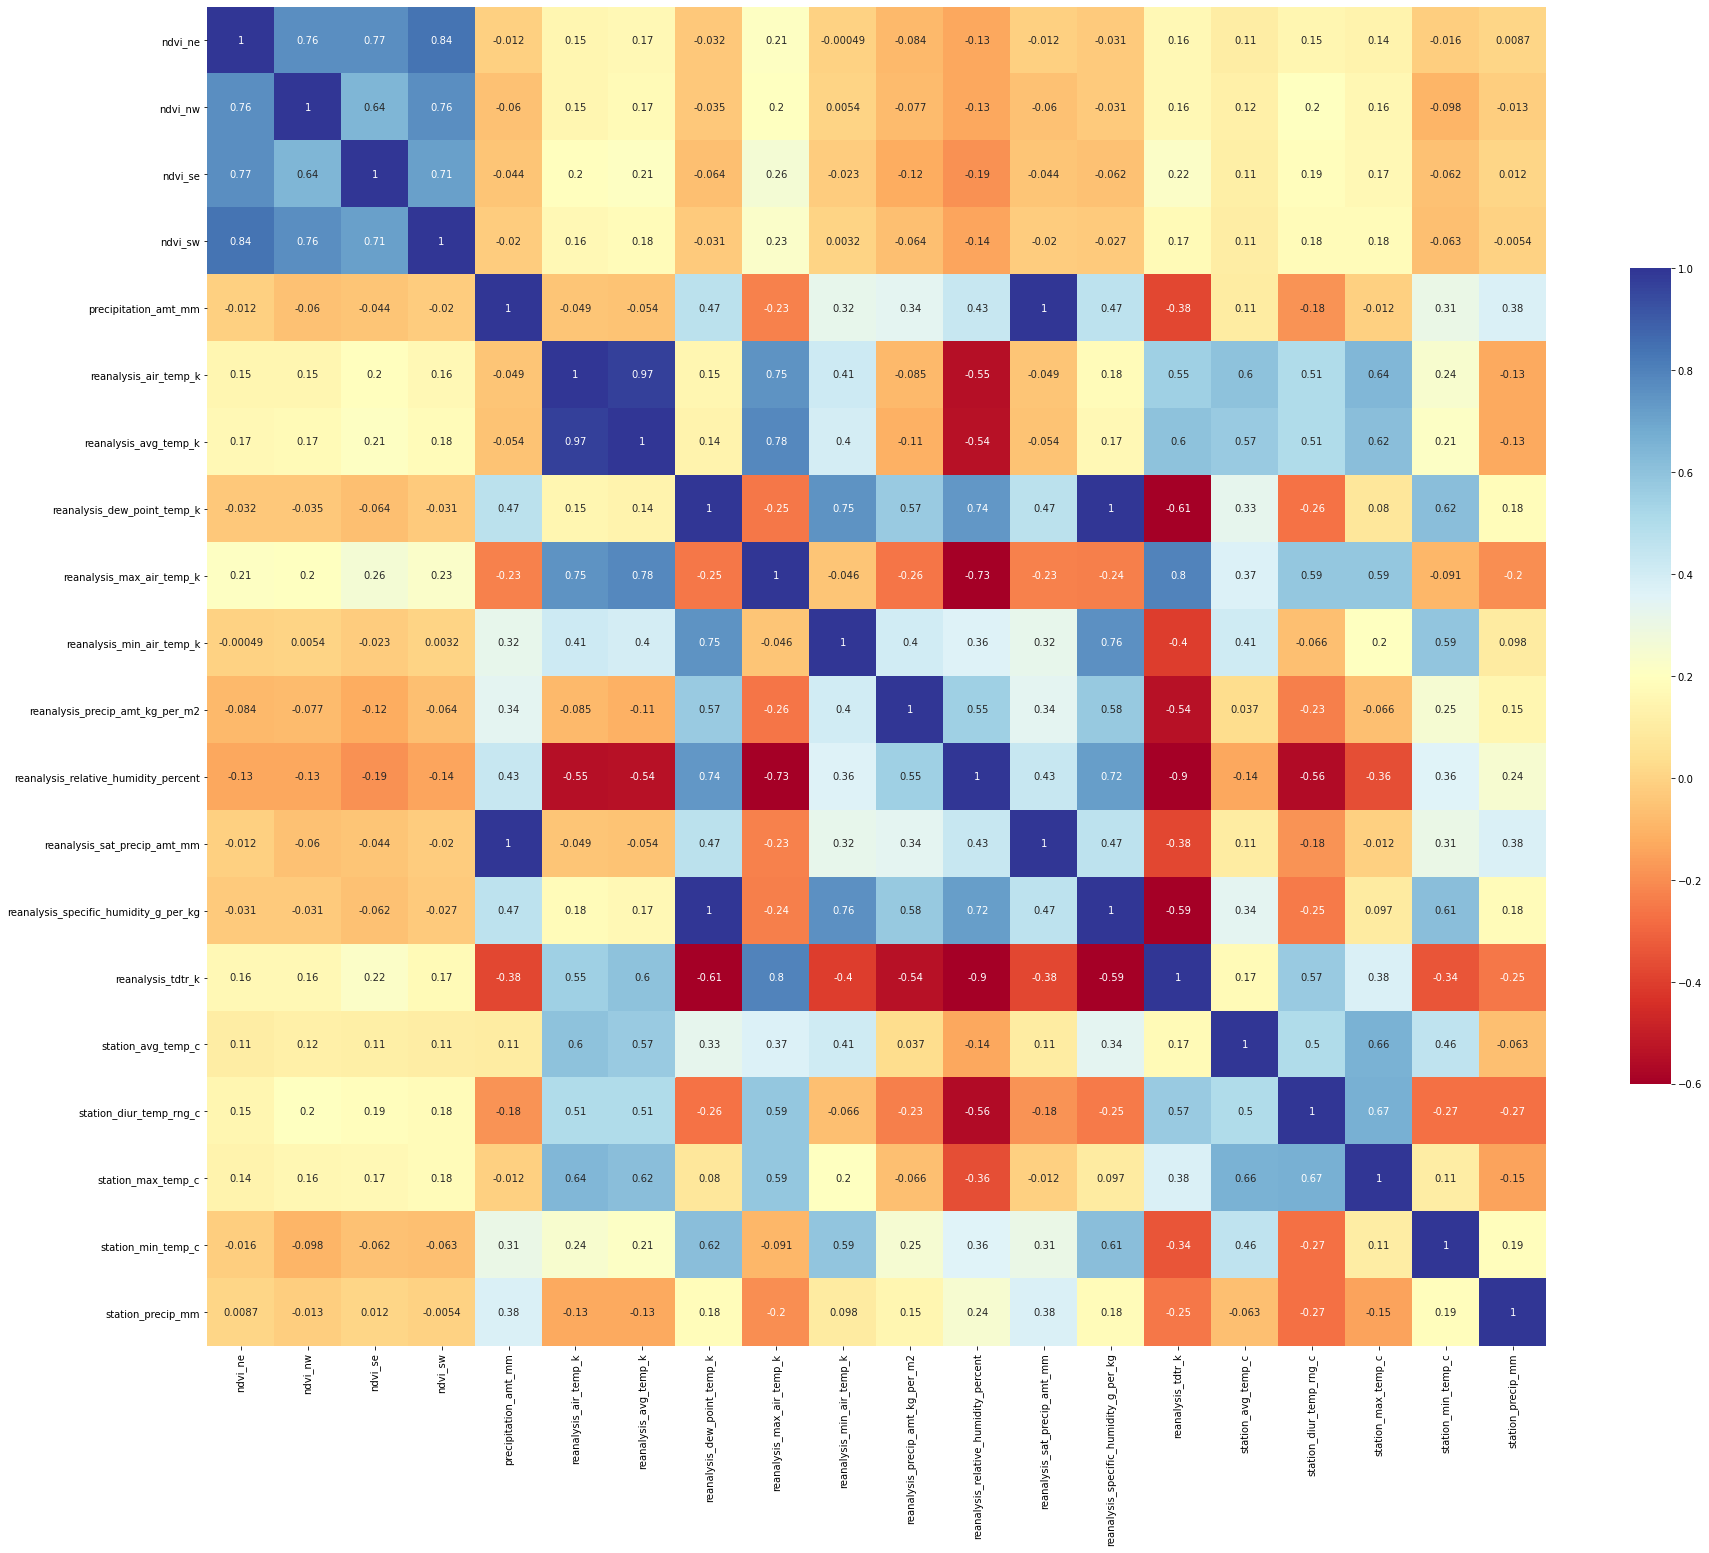

In [31]:
corr = iq_train_features.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

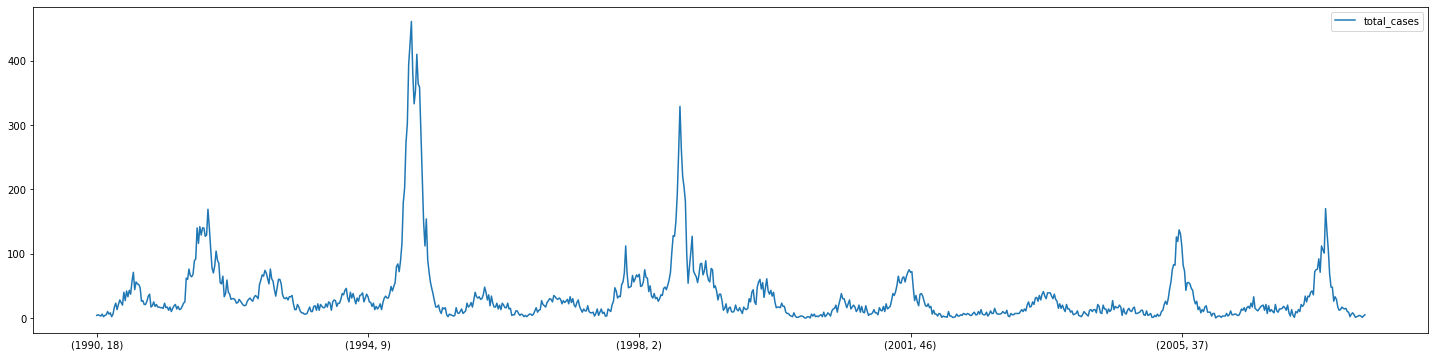

In [32]:
sj_train_labels.plot(figsize=(25,6));

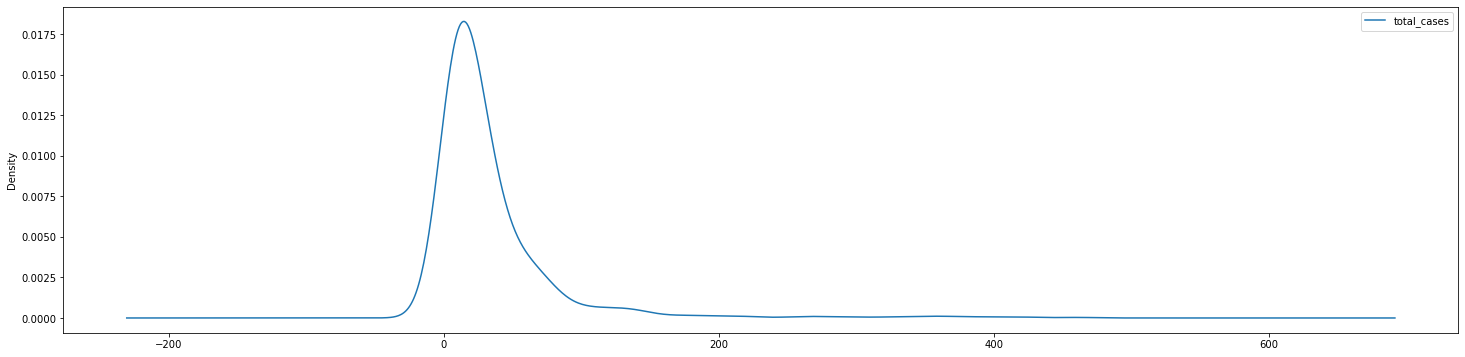

In [33]:
sj_train_labels.plot.density(figsize=(25,6));

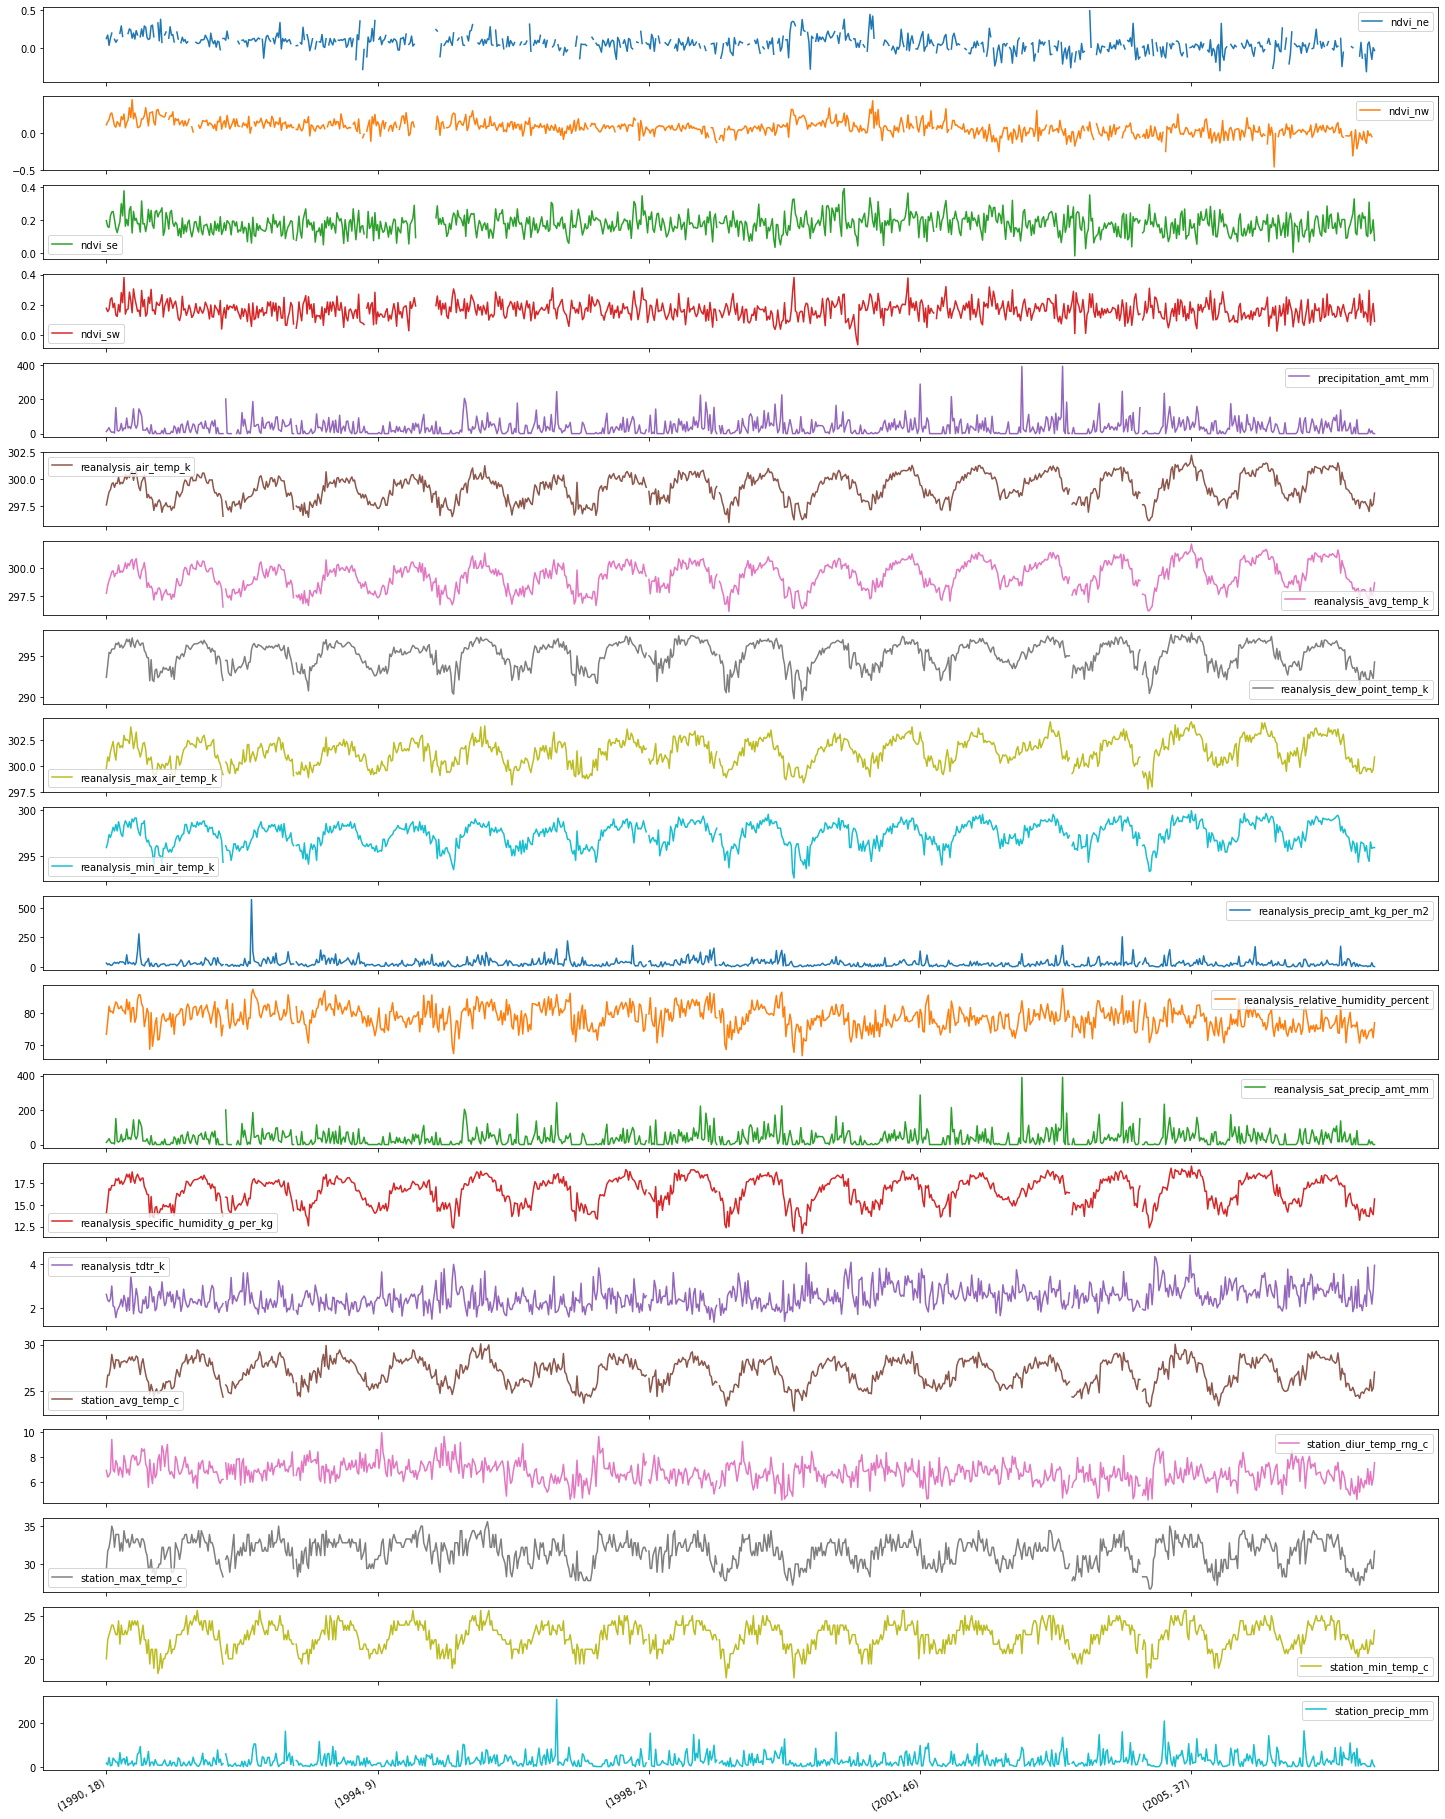

In [34]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

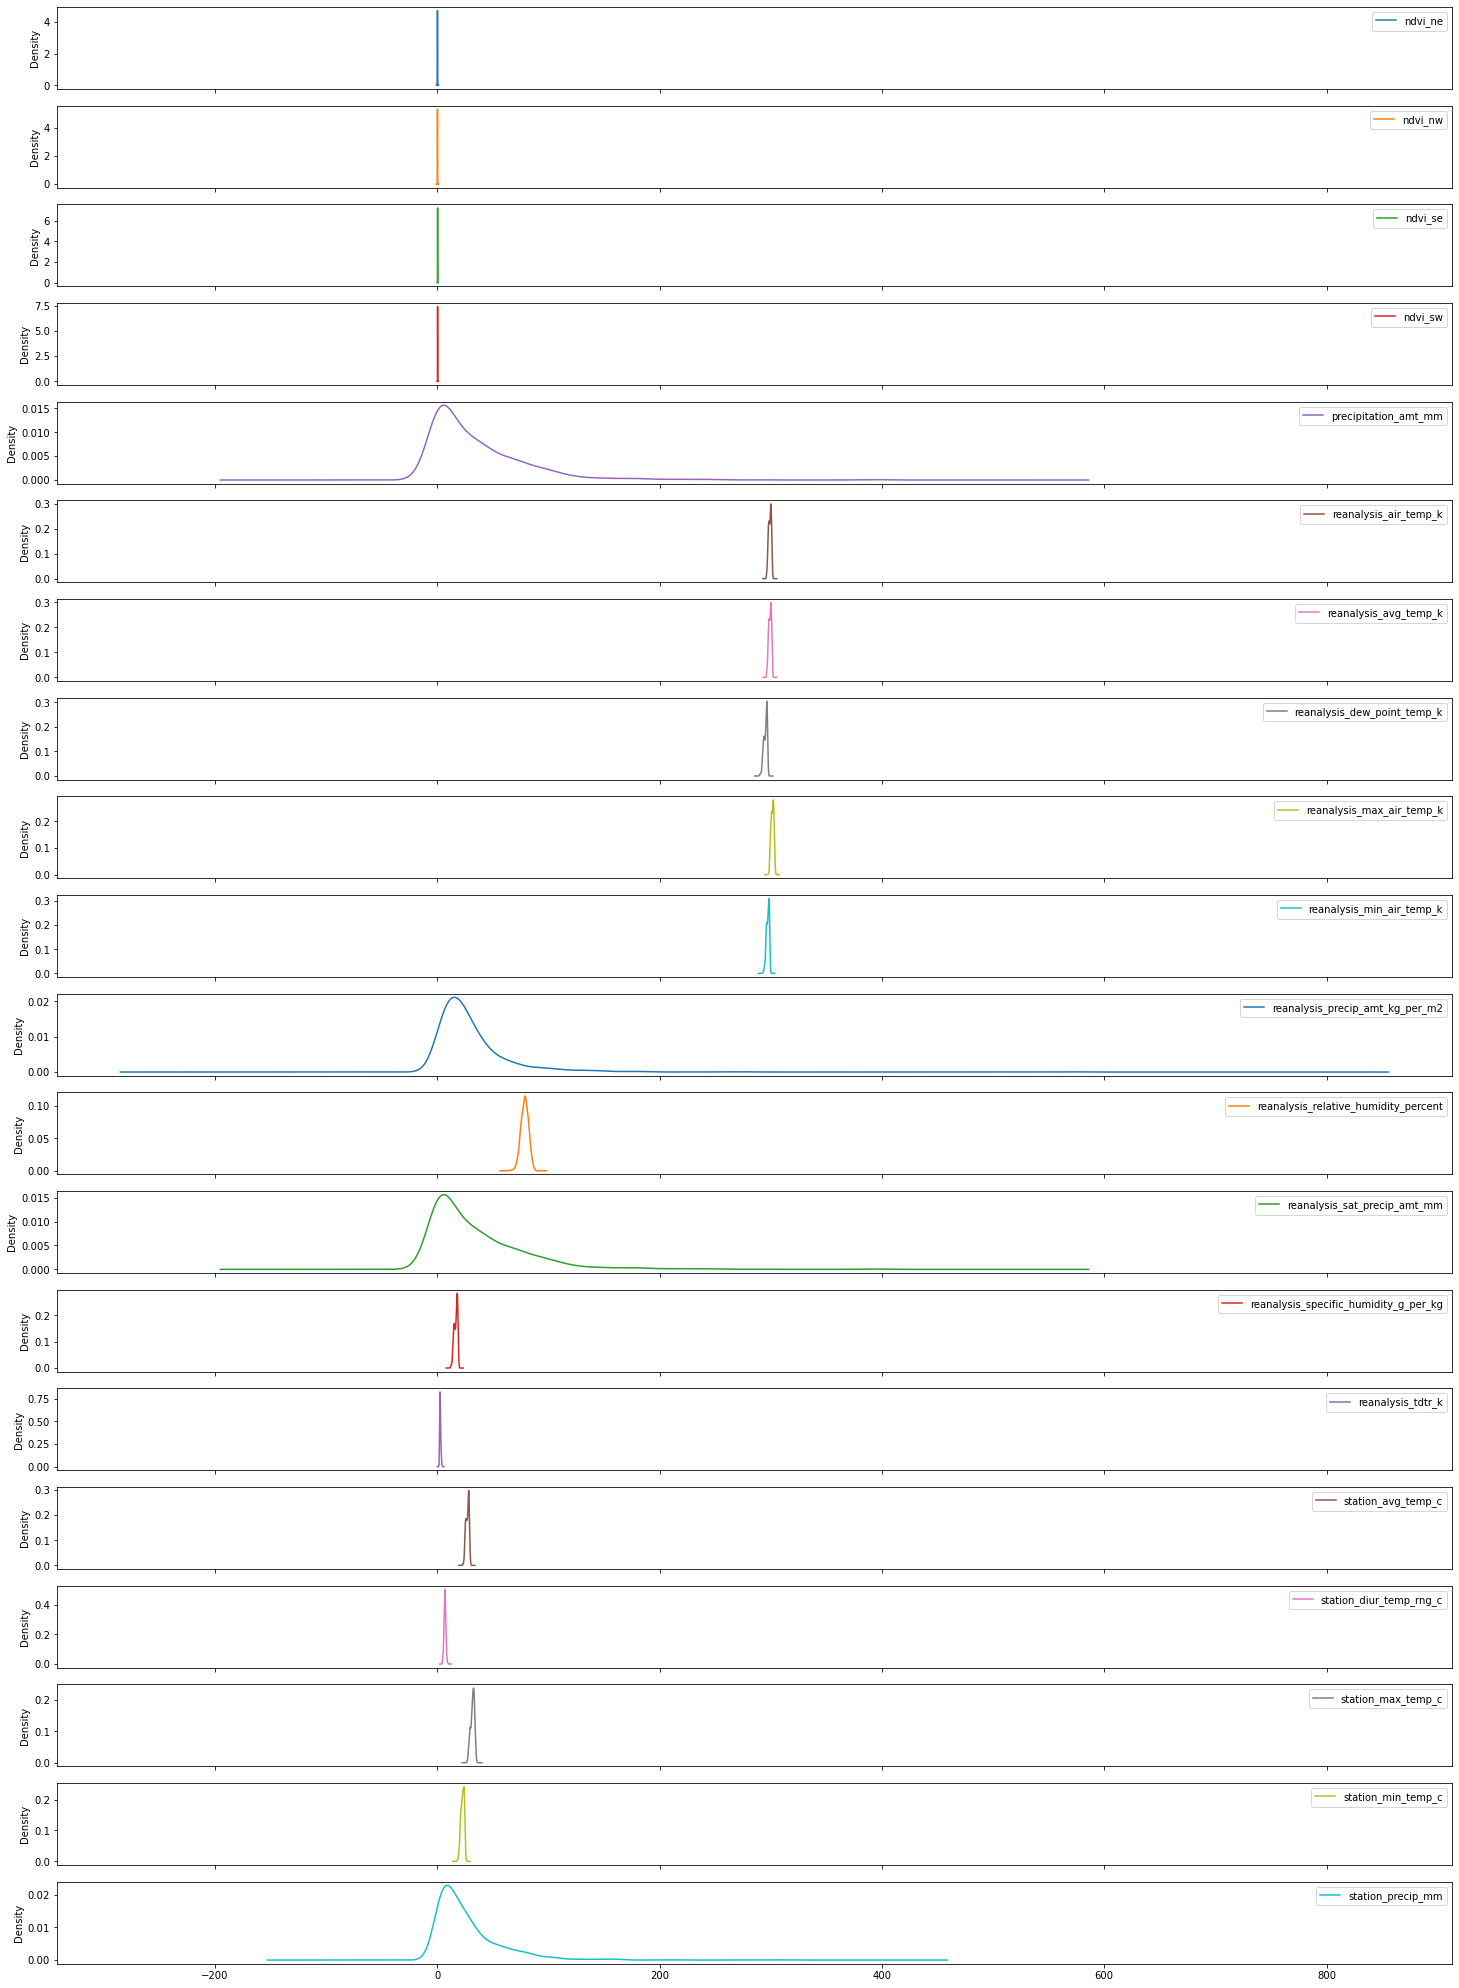

In [35]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot.density(figsize=(25,36),subplots=True);

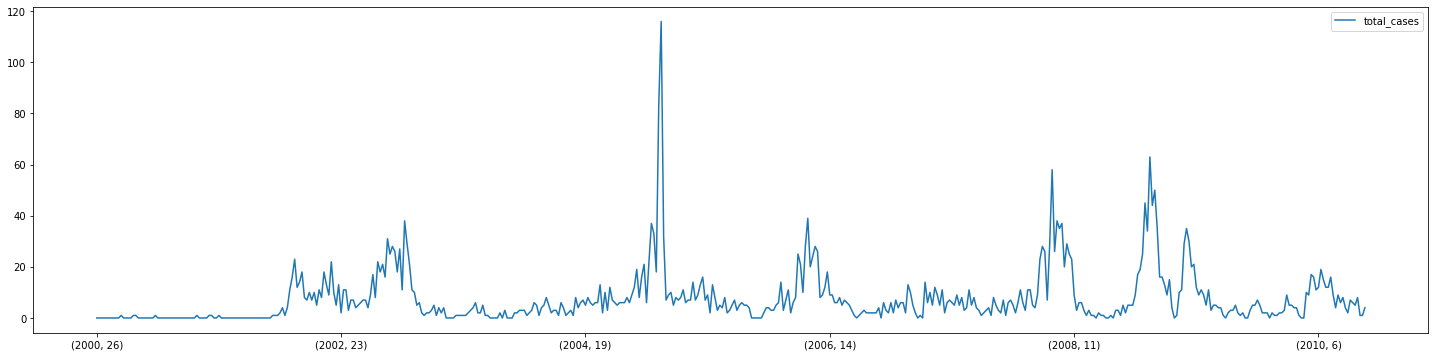

In [36]:
iq_train_labels.plot(figsize=(25,6));

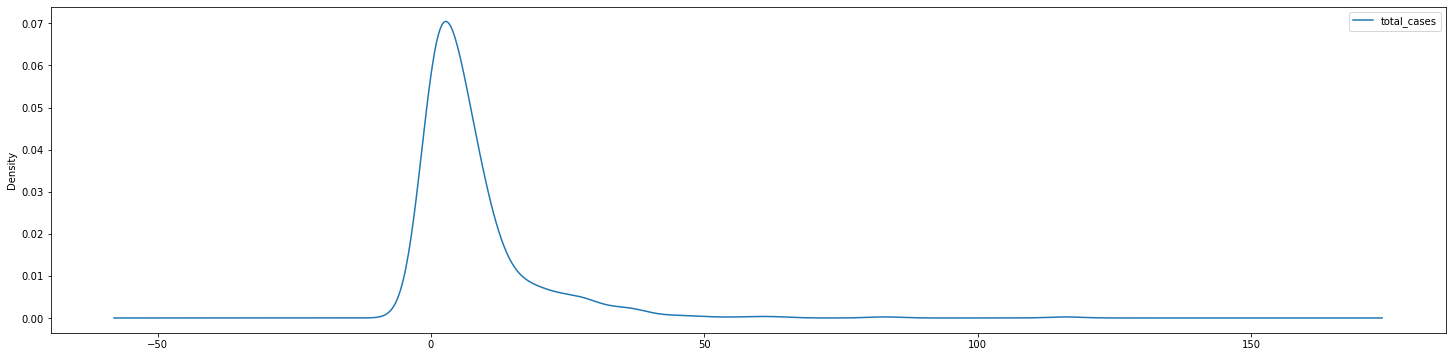

In [37]:
iq_train_labels.plot.density(figsize=(25,6));

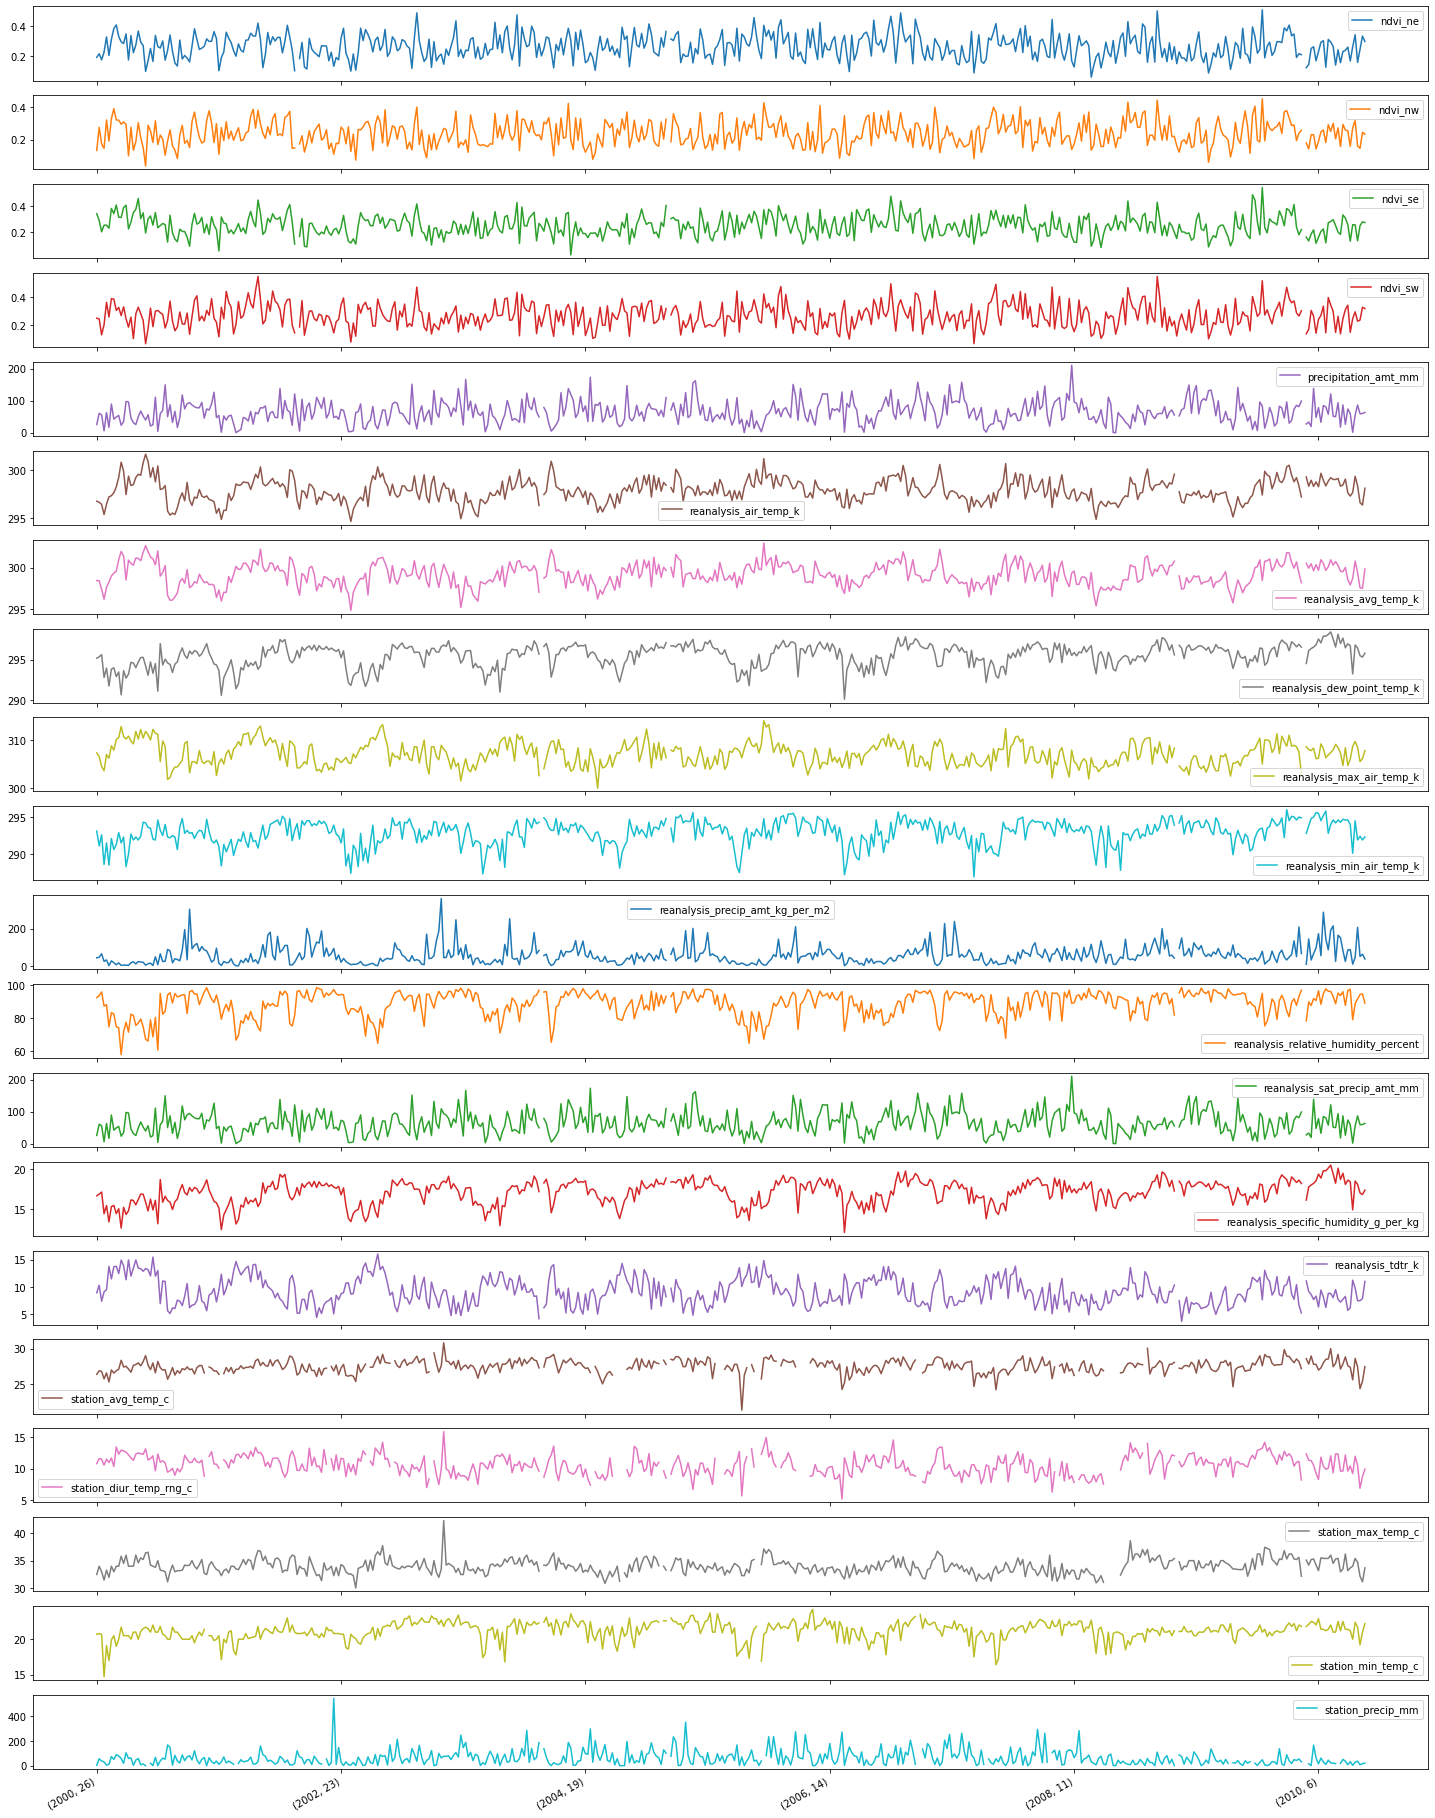

In [38]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

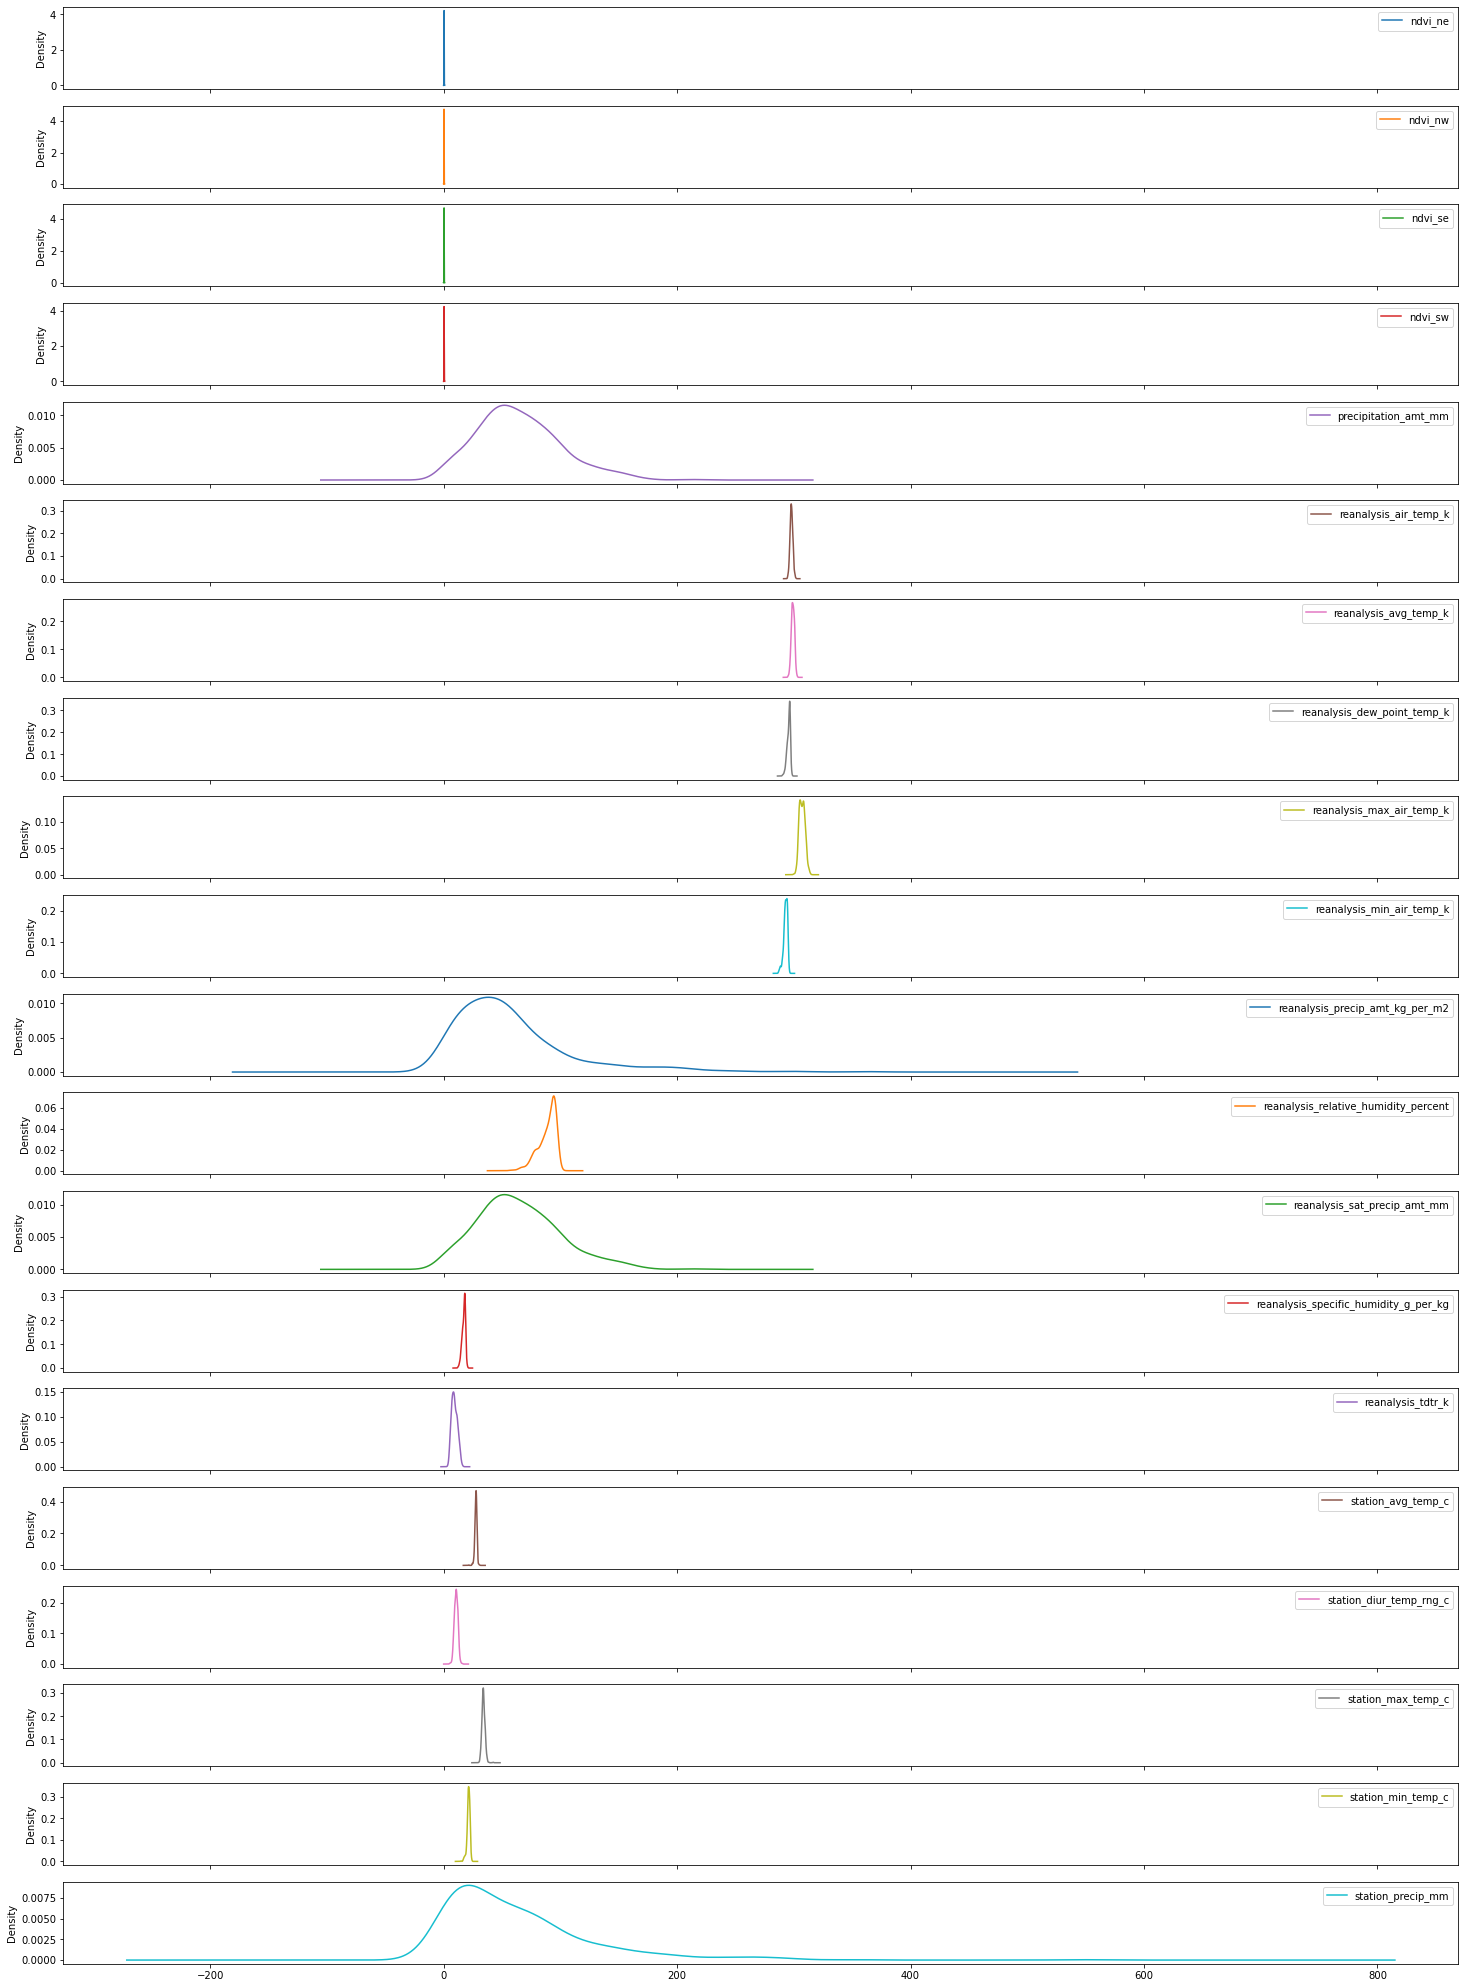

In [39]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot.density(figsize=(25,36),subplots=True);

In [40]:
sj_train_features.isna().sum()

week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [41]:
sj_train_features.fillna(method='ffill', inplace=True)
sj_train_features.isna().sum()

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

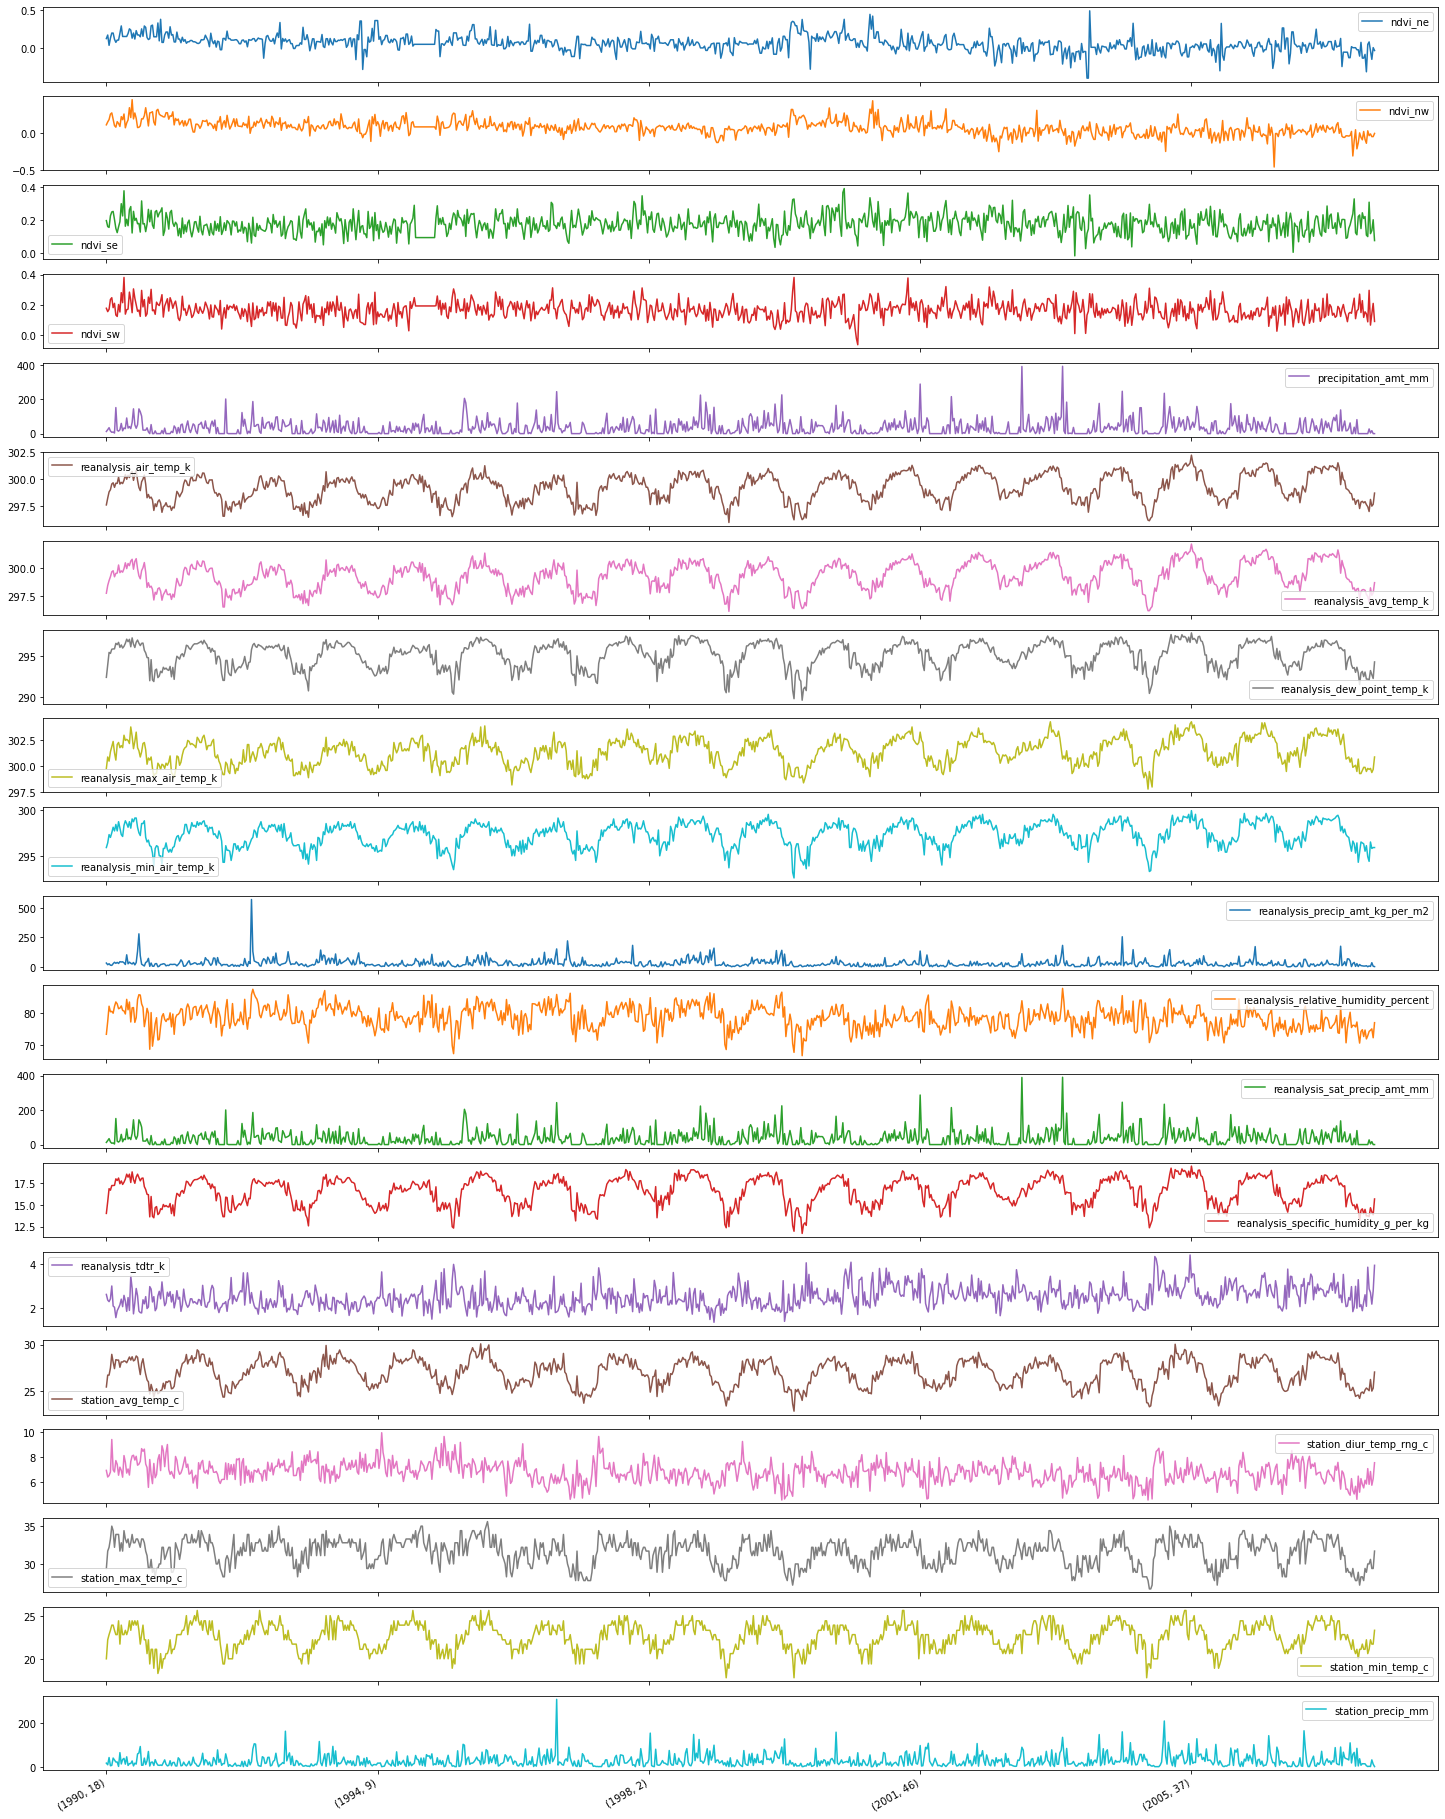

In [42]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

In [43]:
sj_train_labels.isna().sum()

total_cases    0
dtype: int64

In [44]:
iq_train_features.isna().sum()

week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

In [45]:
iq_train_features.fillna(method='ffill', inplace=True)
iq_train_features.isna().sum()

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

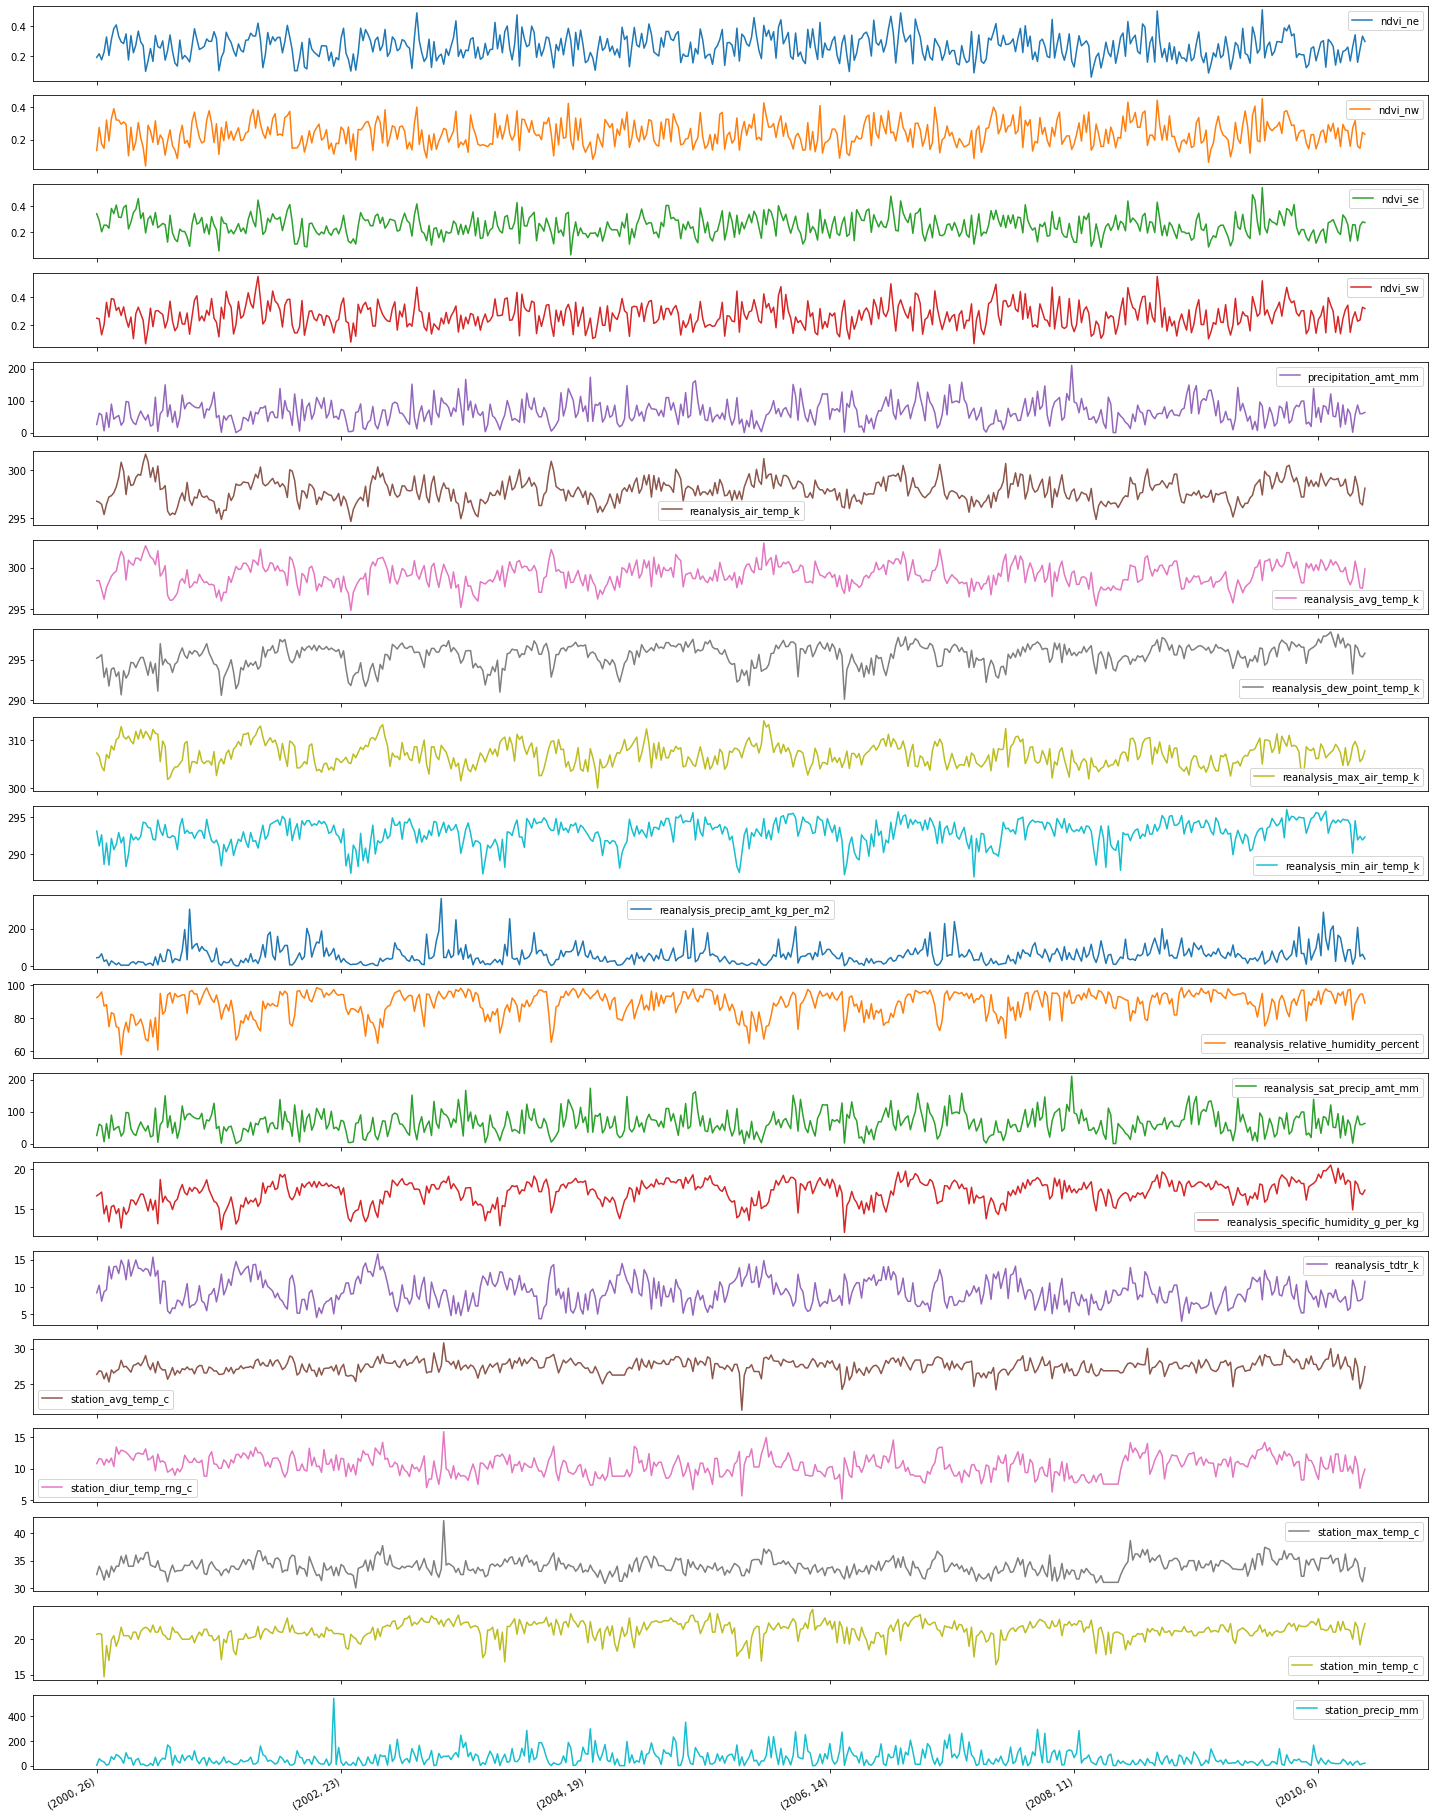

In [46]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

In [47]:
iq_train_labels.isna().sum()

total_cases    0
dtype: int64

In [48]:
iq_train_features.columns.nunique()

21

# split training set and then standardize all data on using the mean and std

In [49]:
def standardize(x, mean, std):
  return (x - mean) / std

def inv_standardize(x, mean, std):
  return (x * std) + mean

# TensorFlow section 
### LSTM model
#### add some Convolution layers maybe

In [ ]:
# !pip install --upgrade tensorflow

In [50]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf

In [51]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

In [52]:
tf.__version__

'2.1.0-rc0'

In [53]:
tf.random.set_seed(29)

In [54]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

# San Juan predictions below

In [55]:
data = sj_train_labels['total_cases']
data.index = sj_train_features['week_start_date']
data.head()

week_start_date
1990-04-30    4
1990-05-07    5
1990-05-14    4
1990-05-21    3
1990-05-28    6
Name: total_cases, dtype: int64

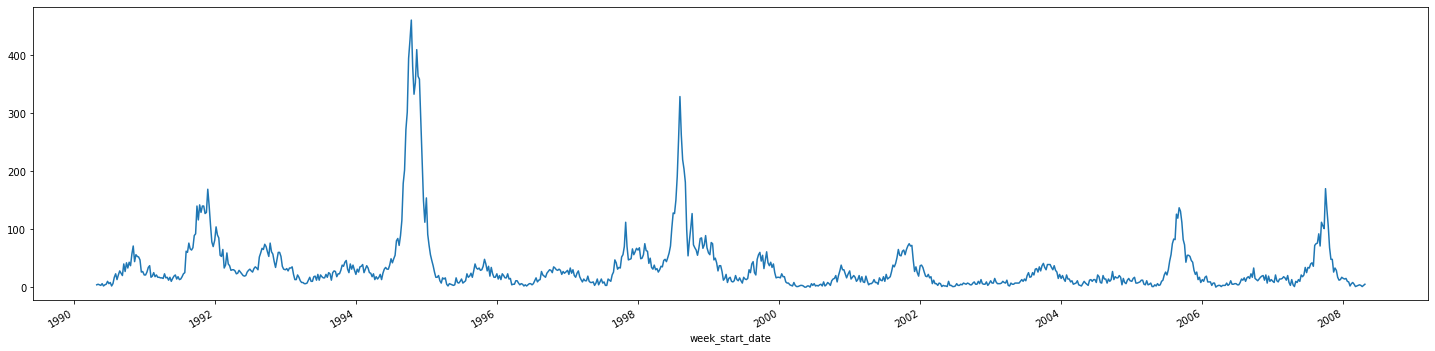

In [56]:
data.plot(figsize=(25,6),subplots=True);

In [57]:
TRAIN_SPLIT = len(data) - 208

In [58]:
desc = data[:TRAIN_SPLIT].describe()
desc

count    728.000000
mean      37.259615
std       55.644775
min        0.000000
25%       10.000000
50%       22.000000
75%       40.000000
max      461.000000
Name: total_cases, dtype: float64

In [59]:
data = data.values

In [60]:
train_mean = np.array(desc.T['mean'])
train_std = np.array(desc.T['std'])

In [61]:
data = standardize(data,train_mean,train_std)

In [62]:
past_history = 52
future_target = 0

x_train, y_train = univariate_data(data, 0, TRAIN_SPLIT, past_history, future_target)
x_val, y_val = univariate_data(data, TRAIN_SPLIT, None, past_history, future_target)

In [63]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target to predict')
print (y_train[0])
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(x_val.shape))
print("y_val shape:{}".format(y_val.shape))

Single window of past history
[[-0.59771317]
 [-0.57974204]
 [-0.59771317]
 [-0.61568431]
 [-0.5617709 ]
 [-0.63365545]
 [-0.59771317]
 [-0.57974204]
 [-0.48988634]
 [-0.5617709 ]
 [-0.52582862]
 [-0.63365545]
 [-0.5617709 ]
 [-0.36408837]
 [-0.25626153]
 [-0.43597292]
 [-0.29220381]
 [-0.16640584]
 [-0.23829039]
 [-0.31017495]
 [ 0.04924783]
 [-0.18437698]
 [ 0.08519011]
 [-0.07655014]
 [ 0.10316125]
 [-0.00466558]
 [ 0.3547572 ]
 [ 0.60635315]
 [ 0.12113239]
 [ 0.33678606]
 [ 0.28287264]
 [ 0.2649015 ]
 [ 0.17504581]
 [-0.20234811]
 [-0.18437698]
 [-0.29220381]
 [-0.29220381]
 [-0.20234811]
 [-0.058579  ]
 [-0.00466558]
 [-0.36408837]
 [-0.32814609]
 [-0.22031925]
 [-0.34611723]
 [-0.29220381]
 [-0.36408837]
 [-0.36408837]
 [-0.38205951]
 [-0.38205951]
 [-0.40003064]
 [-0.25626153]
 [-0.38205951]]

 Target to predict
-0.36408836623516144
x_train shape:(676, 52, 1)
y_train shape:(676,)
x_val shape:(156, 52, 1)
y_val shape:(156,)


In [64]:
def create_time_steps(length):
  return list(range(-length, 0))

In [65]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0
  plt.figure(figsize=(20,6))
  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

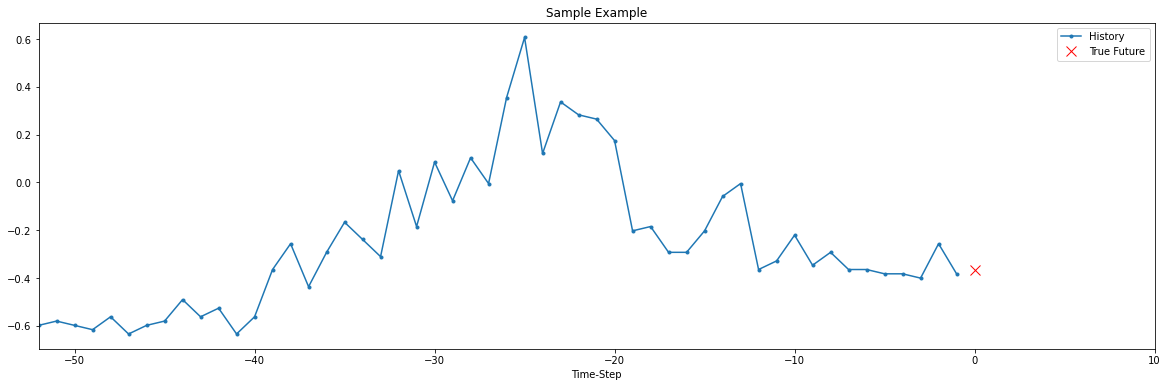

In [66]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example');

In [67]:
def baseline(history):
  return np.mean(history)

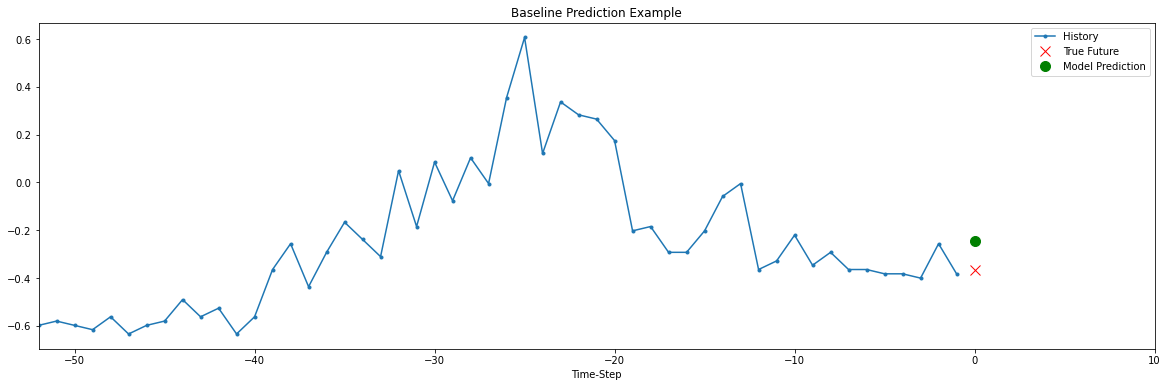

In [68]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example');

In [69]:
BATCH_SIZE = 10000
# BUFFER_SIZE = .shuffle(BUFFER_SIZE)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [70]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train.shape[-2:], activation='elu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [71]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

(156, 1)


In [72]:
EVALUATION_INTERVAL = 936
EPOCHS = 5

single_step_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=26)

Train for 936 steps, validate for 26 steps
Epoch 1/5
936/936 [==============================] - 128s 137ms/step - loss: 0.1638 - val_loss: 0.2316
Epoch 2/5
936/936 [==============================] - 118s 127ms/step - loss: 0.1014 - val_loss: 0.2970
Epoch 3/5
936/936 [==============================] - 123s 131ms/step - loss: 0.0884 - val_loss: 0.3517
Epoch 4/5
936/936 [==============================] - 124s 133ms/step - loss: 0.0782 - val_loss: 0.3130
Epoch 5/5
936/936 [==============================] - 124s 132ms/step - loss: 0.0712 - val_loss: 0.3453


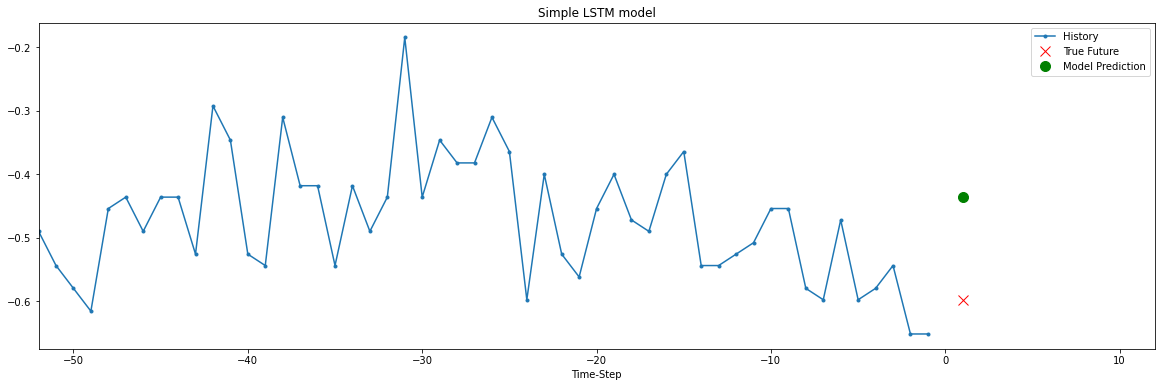

In [73]:
for x, y in val_data.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 1, 'Simple LSTM model')
  plot.show()

In [74]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure(figsize=(25,6))

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

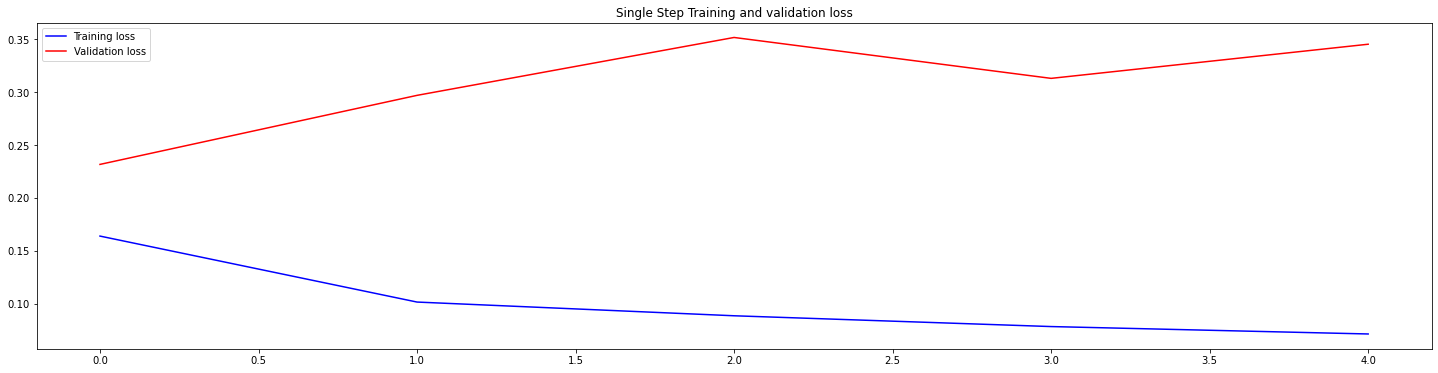

In [75]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [76]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [77]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
(1990, 18)      1990-04-30  0.122600  0.103725  0.198483  0.177617   
(1990, 19)      1990-05-07  0.169900  0.142175  0.162357  0.155486   
(1990, 20)      1990-05-14  0.032250  0.172967  0.157200  0.170843   
(1990, 21)      1990-05-21  0.128633  0.245067  0.227557  0.235886   
(1990, 22)      1990-05-28  0.196200  0.262200  0.251200  0.247340   

            precipitation_amt_mm  reanalysis_air_temp_k  \
(1990, 18)                 12.42             297.572857   
(1990, 19)                 22.82             298.211429   
(1990, 20)                 34.54             298.781429   
(1990, 21)                 15.36             298.987143   
(1990, 22)                  7.52             299.518571   

            reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
(1990, 18)             297.742857                   292.414286   
(1990, 19)             298.442857                   293.951429   
(1990, 20)             298.878571                   295.434286   
(1990, 21)             299.228571                   295.310000   
(1990, 22)             299.664286                   295.821429   

            reanalysis_max_air_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
(1990, 18)                      299.8  ...                            32.00   
(1990, 19)                      300.9  ...                            17.94   
(1990, 20)                      300.5  ...                            26.10   
(1990, 21)                      301.4  ...                            13.90   
(1990, 22)                      301.9  ...                            12.20   

            reanalysis_relative_humidity_percent  \
(1990, 18)                             73.365714   
(1990, 19)                             77.368571   
(1990, 20)                             82.052857   
(1990, 21)                             80.337143   
(1990, 22)                             80.460000   

            reanalysis_sat_precip_amt_mm  \
(1990, 18)                         12.42   
(1990, 19)                         22.82   
(1990, 20)                         34.54   
(1990, 21)                         15.36   
(1990, 22)                          7.52   

            reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
(1990, 18)                              14.012857           2.628571   
(1990, 19)                              15.372857           2.371429   
(1990, 20)                              16.848571           2.300000   
(1990, 21)                              16.672857           2.428571   
(1990, 22)                              17.210000           3.014286   

            station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
(1990, 18)           25.442857                 6.900000                29.4   
(1990, 19)           26.714286                 6.371429                31.7   
(1990, 20)           26.714286                 6.485714                32.2   
(1990, 21)           27.471429                 6.771429                33.3   
(1990, 22)           28.942857                 9.371429                35.0   

            station_min_temp_c  station_precip_mm  
(1990, 18)                20.0               16.0  
(1990, 19)                22.2                8.6  
(1990, 20)                22.8               41.4  
(1990, 21)                23.3                4.0  
(1990, 22)                23.9                5.8  

[5 rows x 21 columns]

In [78]:
sj_train_features.loc[:,'month'] = sj_train_features.week_start_date.dt.month

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [79]:
[*sj_train_features.columns]

['week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

In [80]:
features_considered = ['precipitation_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_air_temp_k','month']
#  

In [81]:
len(sj_train_features[features_considered]),len(sj_train_labels)

(936, 936)

In [82]:
features = sj_train_features[features_considered]
features.loc[:,'total_cases'] = sj_train_labels.values
features.index = sj_train_features['week_start_date']
features.head()

precipitation_amt_mm  reanalysis_specific_humidity_g_per_kg  \
week_start_date                                                                
1990-04-30                      12.42                              14.012857   
1990-05-07                      22.82                              15.372857   
1990-05-14                      34.54                              16.848571   
1990-05-21                      15.36                              16.672857   
1990-05-28                       7.52                              17.210000   

                 reanalysis_air_temp_k  month  total_cases  
week_start_date                                             
1990-04-30                  297.572857      4            4  
1990-05-07                  298.211429      5            5  
1990-05-14                  298.781429      5            4  
1990-05-21                  298.987143      5            3  
1990-05-28                  299.518571      5            6

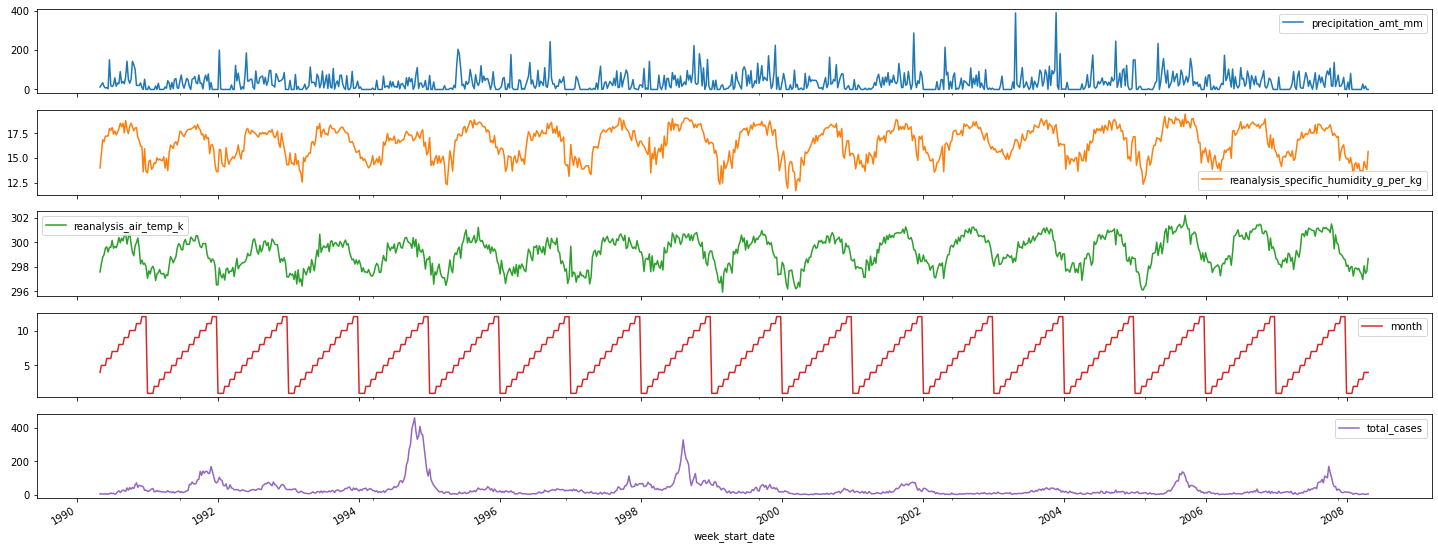

In [83]:
features.plot(subplots=True, figsize=(25,10));

In [84]:
desc = features[:TRAIN_SPLIT].describe()
desc

precipitation_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count            728.000000                             728.000000   
mean              34.195316                              16.498936   
std               44.870593                               1.534007   
min                0.000000                              11.715714   
25%                0.000000                              15.237857   
50%               20.015000                              16.771429   
75%               49.575000                              17.792857   
max              390.600000                              19.044286   

       reanalysis_air_temp_k       month  total_cases  
count             728.000000  728.000000   728.000000  
mean              299.040838    6.418956    37.259615  
std                 1.174638    3.453607    55.644775  
min               295.938571    1.000000     0.000000  
25%               298.087500    3.750000    10.000000  
50%               299.200714    6.500000    22.000000  
75%               300.001429    9.000000    40.000000  
max               301.255714   12.000000   461.000000

In [85]:
dataset = features.values
data_mean = np.array(desc.T['mean'])
data_std = np.array(desc.T['std'])
data_mean,data_std

(array([ 34.19531593,  16.49893642, 299.04083791,   6.41895604,
         37.25961538]),
 array([44.87059272,  1.53400746,  1.17463791,  3.45360653, 55.64477545]))

In [86]:
dataset[:3,:]

array([[ 12.42      ,  14.01285714, 297.57285714,   4.        ,
          4.        ],
       [ 22.82      ,  15.37285714, 298.21142857,   5.        ,
          5.        ],
       [ 34.54      ,  16.84857143, 298.78142857,   5.        ,
          4.        ]])

In [87]:
dataset = standardize(dataset,data_mean,data_std)

In [88]:
dataset[:3,],dataset.shape

(array([[-0.48529147, -1.62064354, -1.24973046, -0.70041449, -0.59771317],
        [-0.25351383, -0.7340768 , -0.70609788, -0.4108621 , -0.57974204],
        [ 0.00768174,  0.22792263, -0.22084196, -0.4108621 , -0.59771317]]),
 (936, 5))

In [89]:
past_history = 104
future_target = 52
STEP = 104
target_col = 4

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, target_col], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, target_col],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [90]:
dataset[:3, target_col]

array([-0.59771317, -0.57974204, -0.59771317])

In [91]:
print ('Single window of past history : {} {}'.format(x_train_single[0],x_train_single.shape))

Single window of past history : [[-0.48529147 -1.62064354 -1.24973046 -0.70041449 -0.59771317]] (624, 1, 5)


In [92]:
# .shuffle(BUFFER_SIZE)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [93]:
single_step_model = tf.keras.models.Sequential([
                                                tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
                                                tf.keras.layers.Dense(1)
                                              ])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [94]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(52, 1)


In [95]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=52)

Train for 936 steps, validate for 52 steps
Epoch 1/5
936/936 [==============================] - 8s 9ms/step - loss: 0.3899 - val_loss: 0.4515
Epoch 2/5
936/936 [==============================] - 5s 6ms/step - loss: 0.3583 - val_loss: 0.4565
Epoch 3/5
936/936 [==============================] - 5s 6ms/step - loss: 0.3386 - val_loss: 0.4586
Epoch 4/5
936/936 [==============================] - 5s 6ms/step - loss: 0.3233 - val_loss: 0.4392
Epoch 5/5
936/936 [==============================] - 5s 6ms/step - loss: 0.3102 - val_loss: 0.4328


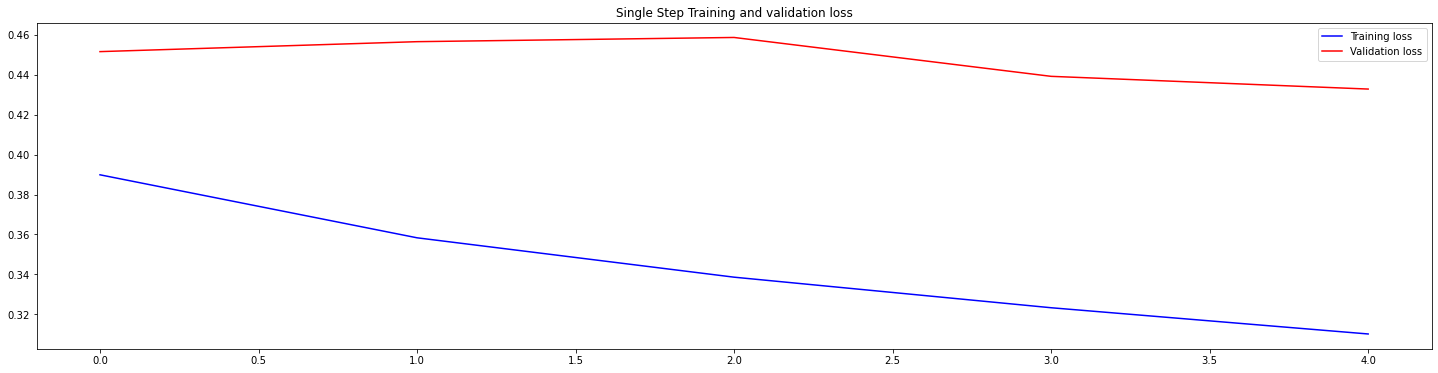

In [96]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

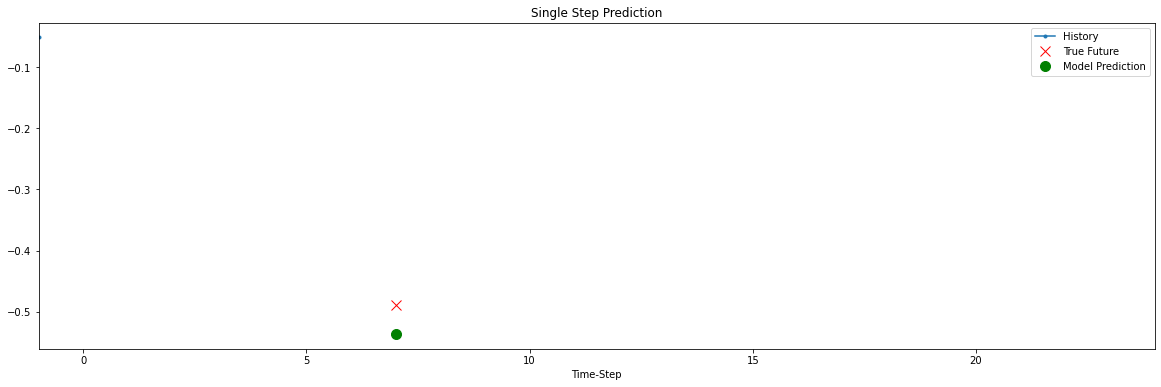

In [97]:
for x, y in val_data_single.take(1):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 7,
                   'Single Step Prediction')
  plot.show()

In [98]:
future_target = 52
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, target_col], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, target_col],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [99]:
print ('Single window of past history and shape : {} \n {}'.format(x_train_multi[0],x_train_multi[0].shape))
print ('\n Target to predict and shape : {} \n {}'.format(y_train_multi[0],y_train_multi[0].shape))

Single window of past history and shape : [[-0.48529147 -1.62064354 -1.24973046 -0.70041449 -0.59771317]] 
 (1, 5)

 Target to predict and shape : [-0.23829039 -0.1484347  -0.20234811 -0.25626153 -0.31017495 -0.32814609
 -0.31017495 -0.20234811 -0.1484347  -0.11249242 -0.16640584 -0.20234811
 -0.09452128 -0.04060786 -0.07655014 -0.13046356  0.2649015   0.39069948
  0.53446859  0.49852631  0.66026656  0.58838201  0.42664175  0.28287264
  0.69620884  0.42664175  0.3547572   0.12113239 -0.058579    0.17504581
  0.40867062  0.40867062  0.28287264 -0.02263672 -0.11249242 -0.13046356
 -0.09452128 -0.16640584 -0.07655014 -0.07655014 -0.04060786 -0.27423267
 -0.43597292 -0.43597292 -0.29220381 -0.36408837 -0.4719152  -0.52582862
 -0.52582862 -0.5617709  -0.5617709  -0.54379976] 
 (52,)


In [100]:
# .shuffle(BUFFER_SIZE)

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [101]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(25, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), 'b', label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'b',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'r',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [102]:
multi_step_model = tf.keras.models.Sequential([
                                               tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]),
                                               tf.keras.layers.LSTM(16, activation='elu'),
                                               tf.keras.layers.Dense(future_target)
                                             ])

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [158]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(52, 52)


In [104]:
EPOCHS = 10
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=future_target)

Train for 936 steps, validate for 52 steps
Epoch 1/10
936/936 [==============================] - 12s 13ms/step - loss: 0.4074 - val_loss: 0.3524
Epoch 2/10
936/936 [==============================] - 8s 8ms/step - loss: 0.3598 - val_loss: 0.3551
Epoch 3/10
936/936 [==============================] - 8s 9ms/step - loss: 0.3428 - val_loss: 0.3606
Epoch 4/10
936/936 [==============================] - 8s 9ms/step - loss: 0.3331 - val_loss: 0.3630
Epoch 5/10
936/936 [==============================] - 8s 9ms/step - loss: 0.3261 - val_loss: 0.3624
Epoch 6/10
936/936 [==============================] - 8s 9ms/step - loss: 0.3194 - val_loss: 0.3703
Epoch 7/10
936/936 [==============================] - 8s 9ms/step - loss: 0.3117 - val_loss: 0.3719
Epoch 8/10
936/936 [==============================] - 8s 9ms/step - loss: 0.3022 - val_loss: 0.3775
Epoch 9/10
936/936 [==============================] - 8s 9ms/step - loss: 0.2927 - val_loss: 0.3868
Epoch 10/10
936/936 [==============================] - 

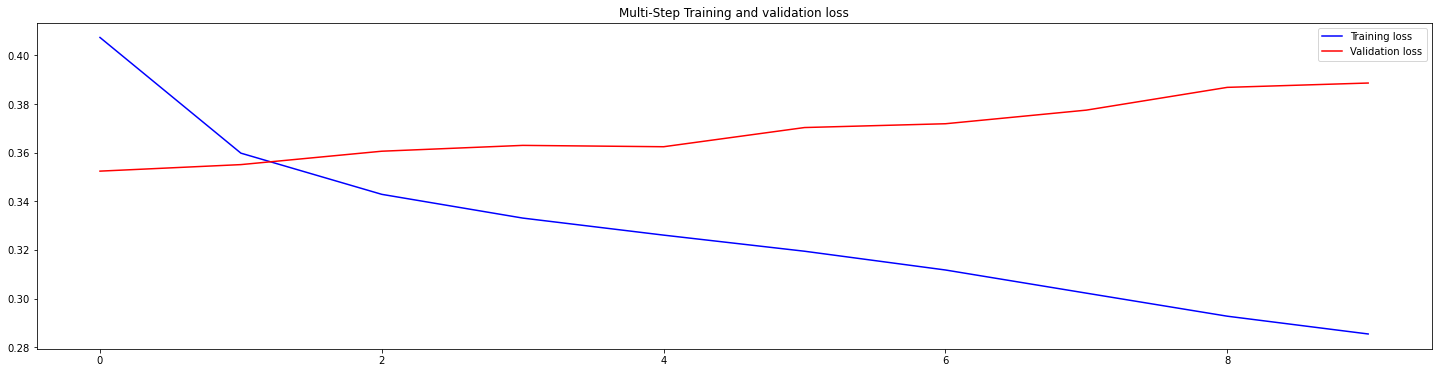

In [105]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

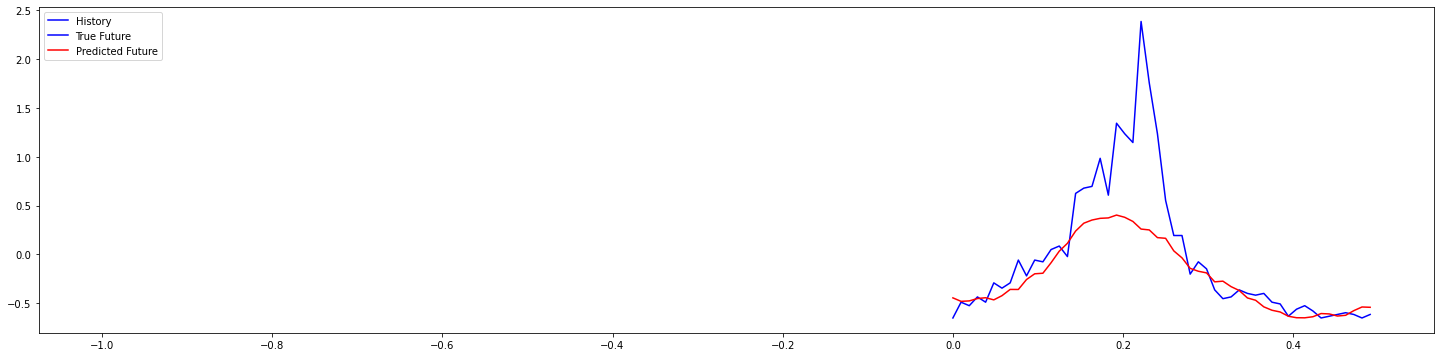

In [106]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[-1], y[-1], multi_step_model.predict(x)[-1])

In [107]:
sj_pred_ = inv_standardize(multi_step_model.predict(x)[-1], data_mean[target_col], data_std[target_col]).astype('int64')
sj_pred_

array([12, 10, 10, 12, 12, 11, 13, 17, 17, 22, 26, 26, 32, 39, 43, 50, 55,
       56, 57, 58, 59, 58, 56, 51, 51, 46, 46, 39, 35, 29, 27, 26, 21, 21,
       18, 16, 12, 11,  7,  5,  4,  1,  1,  1,  1,  3,  3,  2,  2,  5,  7,
        7], dtype=int64)

In [108]:
sj_predictions = pd.DataFrame(sj_pred_, index=features.index[-52:], columns=['TensorFlow_Predictions'])
sj_predictions.head()

TensorFlow Predictions
week_start_date                        
2007-04-30                           12
2007-05-07                           10
2007-05-14                           10
2007-05-21                           12
2007-05-28                           12

In [109]:
sj_predictions.to_csv('sj_predictions.csv')

# Iquitos predictions below


In [110]:
data = iq_train_labels['total_cases']
data.index = iq_train_features['week_start_date']
data.head()

week_start_date
2000-07-01    0
2000-07-08    0
2000-07-15    0
2000-07-22    0
2000-07-29    0
Name: total_cases, dtype: int64

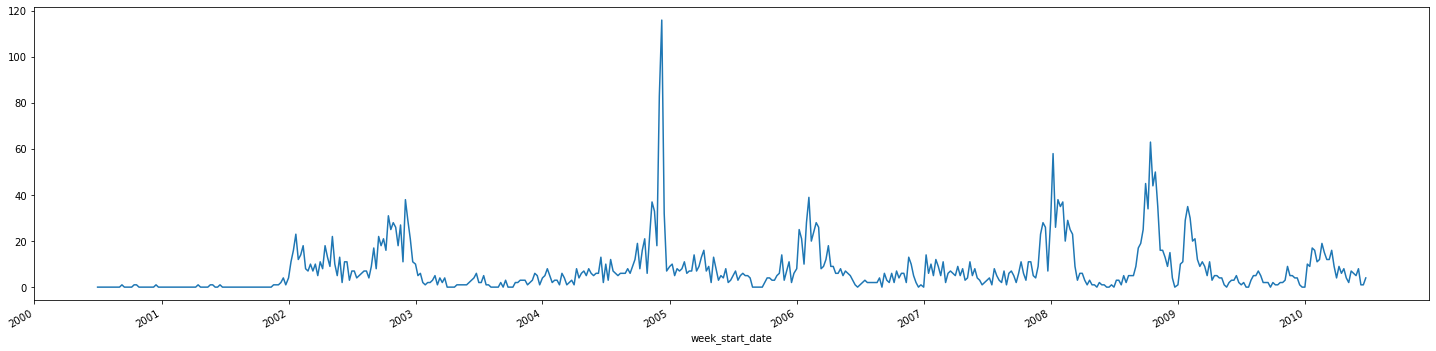

In [111]:
data.plot(figsize=(25,6),subplots=True);

In [112]:
TRAIN_SPLIT = len(data) - 208

In [113]:
desc = data[:TRAIN_SPLIT].describe()
desc

count    312.000000
mean       6.814103
std       10.780955
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      116.000000
Name: total_cases, dtype: float64

In [114]:
data = data.values

In [115]:
train_mean = np.array(desc.T['mean'])
train_std = np.array(desc.T['std'])

In [116]:
data = standardize(data,train_mean,train_std)

In [117]:
past_history = 52
future_target = 0

x_train, y_train = univariate_data(data, 0, TRAIN_SPLIT, past_history, future_target)
x_val, y_val = univariate_data(data, TRAIN_SPLIT, None, past_history, future_target)

In [118]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target to predict')
print (y_train[0])
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(x_val.shape))
print("y_val shape:{}".format(y_val.shape))

Single window of past history
[[-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]]

 Target to predict
-0.6320499798886229
x_train shape:(260, 52, 1)
y_train shape:(260,)
x_val shape:(156, 52, 1)
y_val shape:(156,)


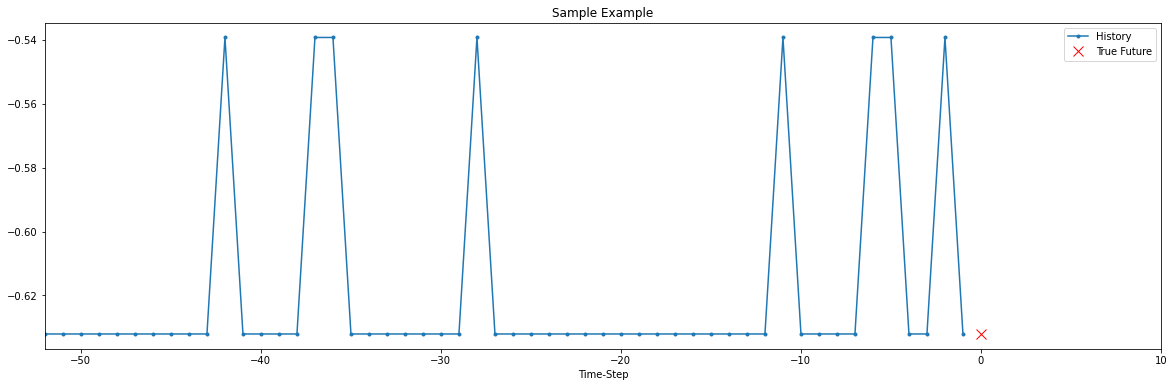

In [119]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example');

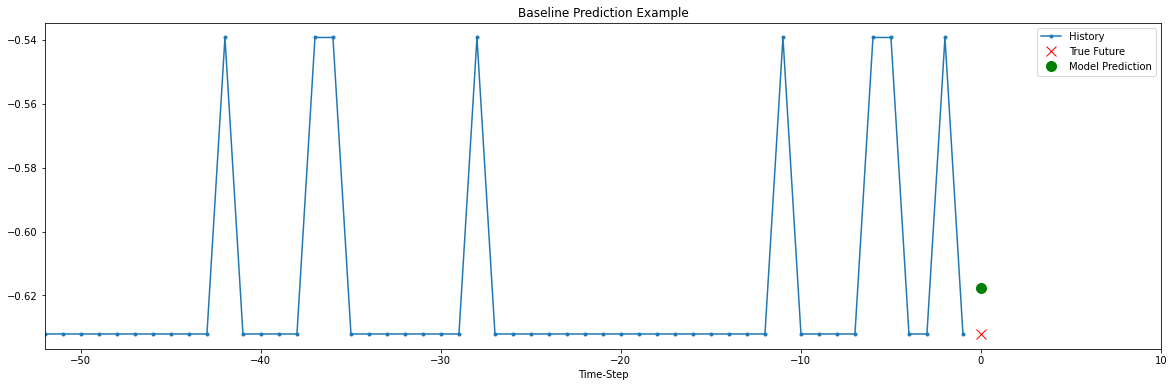

In [120]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example');

In [121]:
BATCH_SIZE = 10000
# BUFFER_SIZE = .shuffle(BUFFER_SIZE)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [159]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train.shape[-2:], activation='relu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [160]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

(156, 1)


In [161]:
EVALUATION_INTERVAL = 520
EPOCHS = 5

single_step_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=26)

Train for 520 steps, validate for 26 steps
Epoch 1/5
520/520 [==============================] - 33s 64ms/step - loss: 0.3426 - val_loss: 0.4437
Epoch 2/5
520/520 [==============================] - 34s 66ms/step - loss: 0.2861 - val_loss: 0.8721
Epoch 3/5
520/520 [==============================] - 36s 68ms/step - loss: 0.2226 - val_loss: 0.9540
Epoch 4/5
520/520 [==============================] - 33s 63ms/step - loss: 0.1803 - val_loss: 1.3215
Epoch 5/5
520/520 [==============================] - 33s 64ms/step - loss: 0.1561 - val_loss: 1.5978


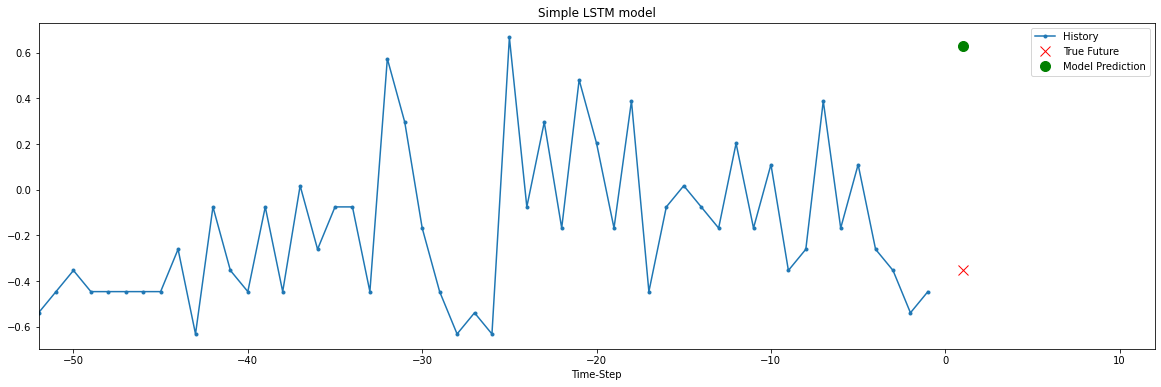

In [162]:
for x, y in val_data.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 1, 'Simple LSTM model')
  plot.show()

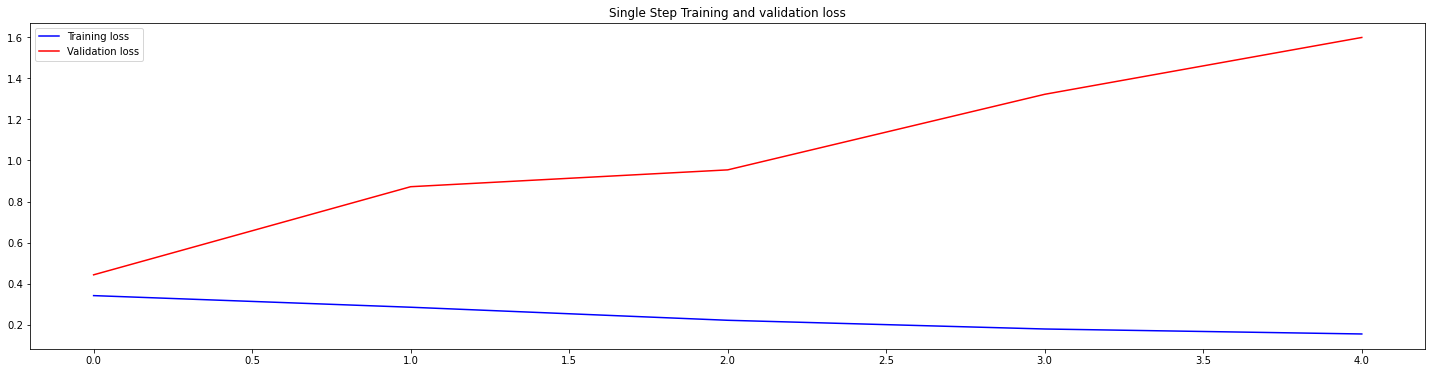

In [163]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [164]:
iq_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
(2000, 26)      2000-07-01  0.192886  0.132257  0.340886  0.247200   
(2000, 27)      2000-07-08  0.216833  0.276100  0.289457  0.241657   
(2000, 28)      2000-07-15  0.176757  0.173129  0.204114  0.128014   
(2000, 29)      2000-07-22  0.227729  0.145429  0.254200  0.200314   
(2000, 30)      2000-07-29  0.328643  0.322129  0.254371  0.361043   

            precipitation_amt_mm  reanalysis_air_temp_k  \
(2000, 26)                 25.41             296.740000   
(2000, 27)                 60.61             296.634286   
(2000, 28)                 55.52             296.415714   
(2000, 29)                  5.60             295.357143   
(2000, 30)                 62.76             296.432857   

            reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
(2000, 26)             298.450000                   295.184286   
(2000, 27)             298.428571                   295.358571   
(2000, 28)             297.392857                   295.622857   
(2000, 29)             296.228571                   292.797143   
(2000, 30)             297.635714                   293.957143   

            reanalysis_max_air_temp_k  ...  \
(2000, 26)                      307.3  ...   
(2000, 27)                      306.6  ...   
(2000, 28)                      304.5  ...   
(2000, 29)                      303.6  ...   
(2000, 30)                      307.0  ...   

            reanalysis_relative_humidity_percent  \
(2000, 26)                             92.418571   
(2000, 27)                             93.581429   
(2000, 28)                             95.848571   
(2000, 29)                             87.234286   
(2000, 30)                             88.161429   

            reanalysis_sat_precip_amt_mm  \
(2000, 26)                         25.41   
(2000, 27)                         60.61   
(2000, 28)                         55.52   
(2000, 29)                          5.60   
(2000, 30)                         62.76   

            reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
(2000, 26)                              16.651429           8.928571   
(2000, 27)                              16.862857          10.314286   
(2000, 28)                              17.120000           7.385714   
(2000, 29)                              14.431429           9.114286   
(2000, 30)                              15.444286           9.500000   

            station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
(2000, 26)           26.400000                10.775000                32.5   
(2000, 27)           26.900000                11.566667                34.0   
(2000, 28)           26.800000                11.466667                33.0   
(2000, 29)           25.766667                10.533333                31.5   
(2000, 30)           26.600000                11.480000                33.3   

            station_min_temp_c  station_precip_mm  month  
(2000, 26)                20.7                3.0      7  
(2000, 27)                20.8               55.6      7  
(2000, 28)                20.7               38.1      7  
(2000, 29)                14.7               30.0      7  
(2000, 30)                19.1                4.0      7  

[5 rows x 22 columns]

In [165]:
iq_train_features.loc[:,'month'] = iq_train_features.week_start_date.dt.month

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [166]:
[*iq_train_features.columns]

['week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

In [167]:
features_considered = ['month']
# 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_air_temp_k', 'precipitation_amt_mm', 

In [168]:
len(iq_train_features[features_considered]),len(iq_train_labels)

(520, 520)

In [169]:
features = iq_train_features[features_considered]
features.loc[:,'total_cases'] = iq_train_labels.values
features.index = iq_train_features['week_start_date']
features.head()

C:\Users\bryan\Anaconda3\envs\DataAnalytics\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


month  total_cases
week_start_date                    
2000-07-01           7            0
2000-07-08           7            0
2000-07-15           7            0
2000-07-22           7            0
2000-07-29           7            0

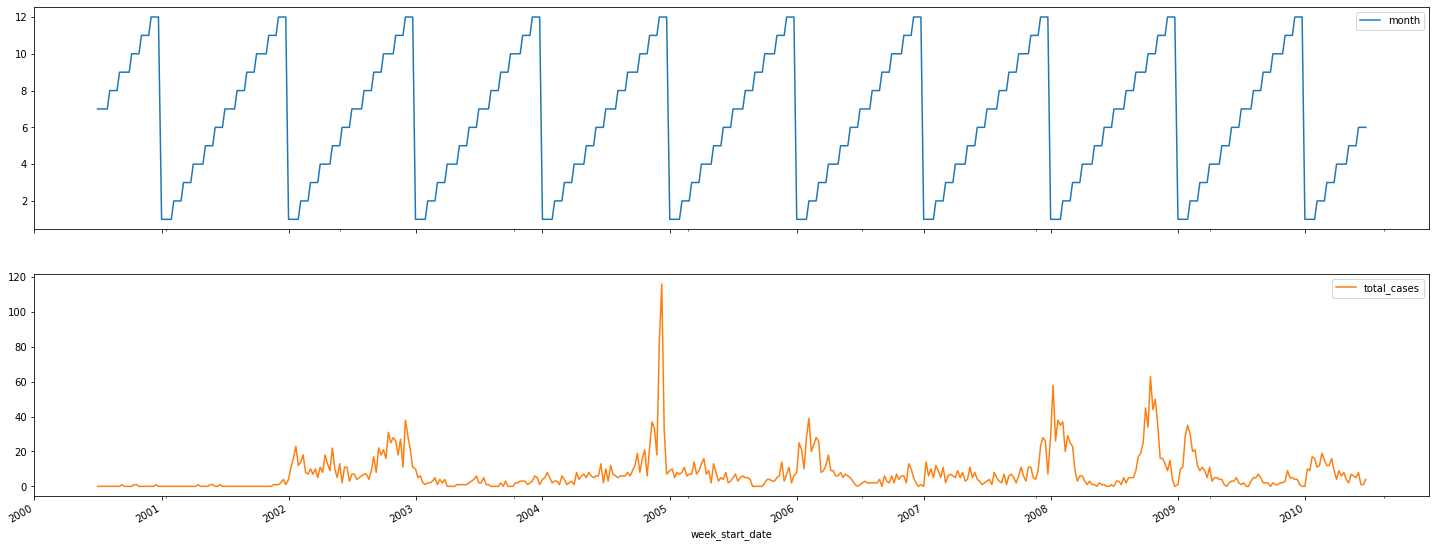

In [170]:
features.plot(subplots=True, figsize=(25,10));


In [171]:
desc = features[:TRAIN_SPLIT].describe()
desc

month  total_cases
count  312.000000   312.000000
mean     6.416667     6.814103
std      3.454729    10.780955
min      1.000000     0.000000
25%      3.750000     0.000000
50%      6.500000     4.000000
75%      9.000000     8.000000
max     12.000000   116.000000

In [172]:
dataset = features.values
data_mean = np.array(desc.T['mean'])
data_std = np.array(desc.T['std'])
data_mean,data_std

(array([6.41666667, 6.81410256]), array([ 3.45472943, 10.78095527]))

In [173]:
dataset[:3,:]

array([[7, 0],
       [7, 0],
       [7, 0]], dtype=int64)

In [174]:
dataset = standardize(dataset,data_mean,data_std)

In [175]:
dataset[:3,],dataset.shape

(array([[ 0.16885066, -0.63204998],
        [ 0.16885066, -0.63204998],
        [ 0.16885066, -0.63204998]]), (520, 2))

In [176]:
past_history = 104
future_target = 52
STEP = 104
target_col = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, target_col], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, target_col],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [177]:
dataset[:3, target_col]

array([-0.63204998, -0.63204998, -0.63204998])

In [178]:
print ('Single window of past history : {} {}'.format(x_train_single[0],x_train_single.shape))

Single window of past history : [[ 0.16885066 -0.63204998]] (208, 1, 2)


In [179]:
# .shuffle(BUFFER_SIZE)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [180]:
single_step_model = tf.keras.models.Sequential([
                                                tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
                                                tf.keras.layers.Dense(1)
                                              ])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [181]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(52, 1)


In [182]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=52)

Train for 520 steps, validate for 52 steps
Epoch 1/5
520/520 [==============================] - 5s 9ms/step - loss: 0.4510 - val_loss: 0.2752
Epoch 2/5
520/520 [==============================] - 3s 5ms/step - loss: 0.4426 - val_loss: 0.2566
Epoch 3/5
520/520 [==============================] - 3s 5ms/step - loss: 0.4364 - val_loss: 0.2510
Epoch 4/5
520/520 [==============================] - 3s 5ms/step - loss: 0.4293 - val_loss: 0.2594
Epoch 5/5
520/520 [==============================] - 2s 5ms/step - loss: 0.4261 - val_loss: 0.2699


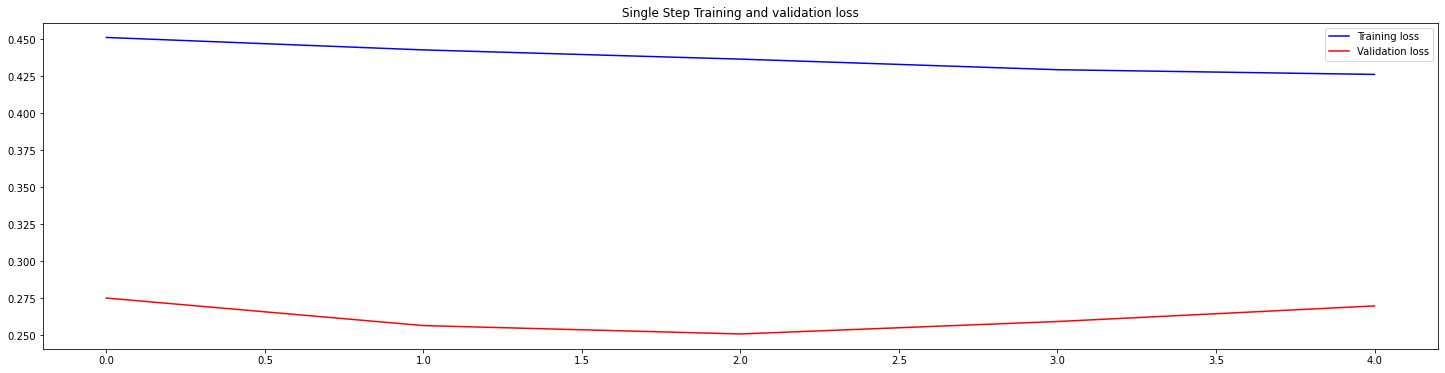

In [183]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

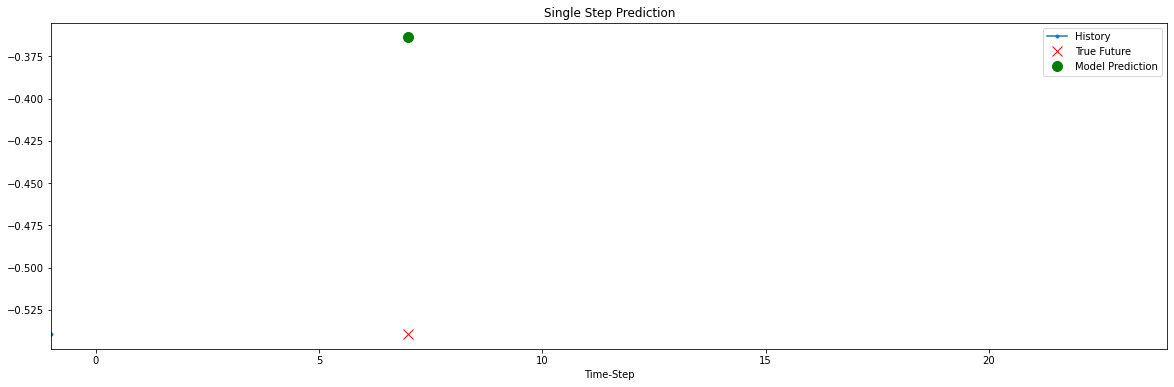

In [184]:
for x, y in val_data_single.take(1):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 7,
                   'Single Step Prediction')
  plot.show()

In [185]:
future_target = 52
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, target_col], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, target_col],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [186]:
print ('Single window of past history and shape : {} \n {}'.format(x_train_multi[0],x_train_multi[0].shape))
print ('\n Target to predict and shape : {} \n {}'.format(y_train_multi[0],y_train_multi[0].shape))

Single window of past history and shape : [[ 0.16885066 -0.63204998]] 
 (1, 2)

 Target to predict and shape : [ 0.01724313  0.01724313 -0.26102534 -0.16826919 -0.07551303  0.01724313
  0.01724313 -0.26102534  0.20275545  0.94480472  0.10999929  1.40858551
  1.03756088  1.31582936  0.85204856  2.24339094  1.68685399  1.96512247
  1.77961015  1.03756088  1.87236631  0.38826777  2.89268406  2.05787863
  1.31582936  0.38826777  0.29551161 -0.16826919 -0.07551303 -0.44653766
 -0.53929382 -0.44653766 -0.44653766 -0.3537815  -0.16826919 -0.53929382
 -0.26102534 -0.44653766 -0.26102534 -0.63204998 -0.63204998 -0.63204998
 -0.63204998 -0.53929382 -0.53929382 -0.53929382 -0.53929382 -0.53929382
 -0.44653766 -0.3537815  -0.26102534 -0.07551303] 
 (52,)


In [187]:
# .shuffle(BUFFER_SIZE)

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [188]:
multi_step_model = tf.keras.models.Sequential([
                                               tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]),
                                               tf.keras.layers.LSTM(16, activation='elu'),
                                               tf.keras.layers.Dense(future_target)
                                             ])

                                              

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [189]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(52, 52)


In [190]:
EPOCHS = 10
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=future_target)

Train for 520 steps, validate for 52 steps
Epoch 1/10
520/520 [==============================] - 7s 13ms/step - loss: 0.4813 - val_loss: 0.5450
Epoch 2/10
520/520 [==============================] - 3s 6ms/step - loss: 0.4548 - val_loss: 0.5383
Epoch 3/10
520/520 [==============================] - 3s 7ms/step - loss: 0.4445 - val_loss: 0.5470
Epoch 4/10
520/520 [==============================] - 4s 7ms/step - loss: 0.4378 - val_loss: 0.5563
Epoch 5/10
520/520 [==============================] - 3s 6ms/step - loss: 0.4318 - val_loss: 0.5613
Epoch 6/10
520/520 [==============================] - 4s 7ms/step - loss: 0.4278 - val_loss: 0.5643
Epoch 7/10
520/520 [==============================] - 3s 7ms/step - loss: 0.4248 - val_loss: 0.5664
Epoch 8/10
520/520 [==============================] - 3s 7ms/step - loss: 0.4224 - val_loss: 0.5685
Epoch 9/10
520/520 [==============================] - 3s 6ms/step - loss: 0.4204 - val_loss: 0.5678
Epoch 10/10
520/520 [==============================] - 4

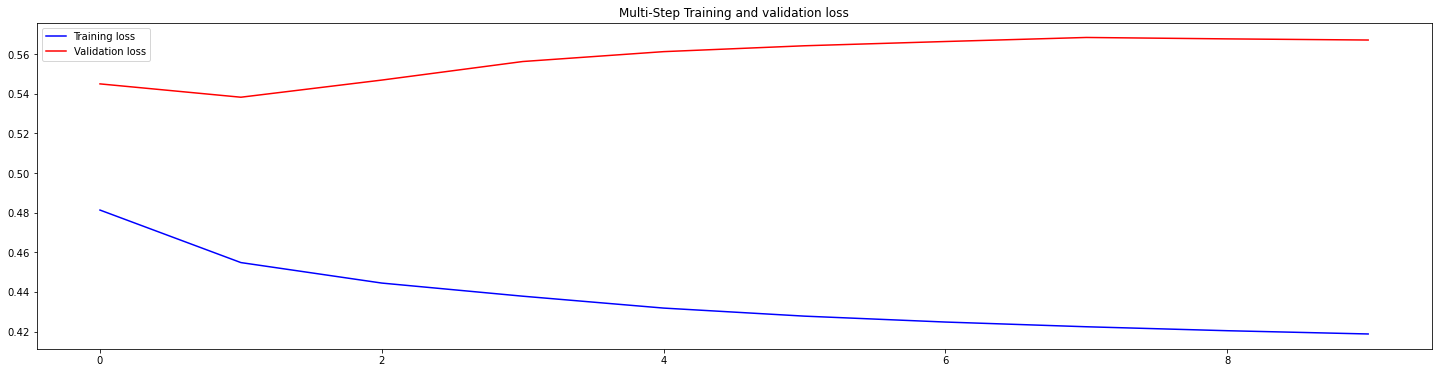

In [191]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

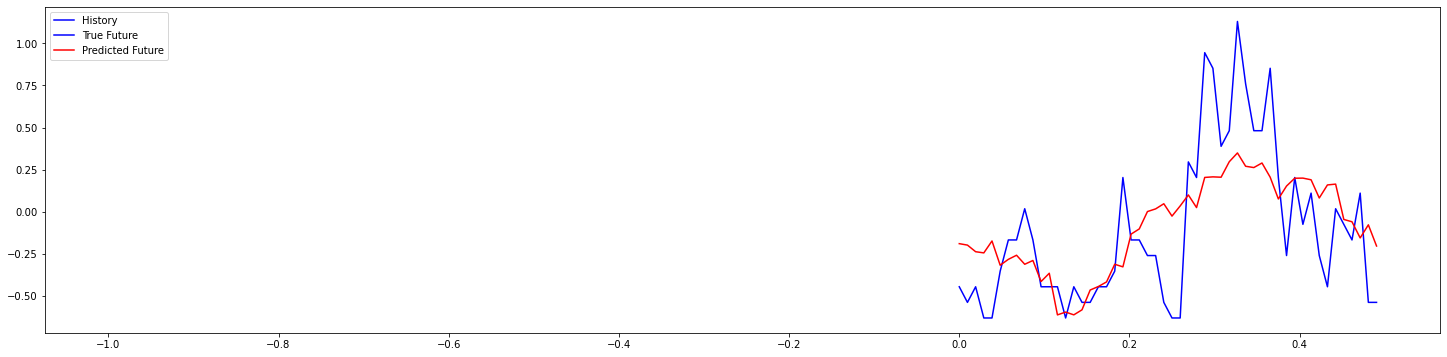

In [192]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[-1], y[-1], multi_step_model.predict(x)[-1])

In [209]:
iq_pred_ = inv_standardize(multi_step_model.predict(x)[-1], data_mean[target_col], data_std[target_col]).astype('int64')

In [210]:
iq_predictions = pd.DataFrame(iq_pred_, index=features.index[-52:], columns=['TensorFlow_Predictions'])
iq_predictions.head()

TensorFlow Predictions
week_start_date                        
2009-07-02                            4
2009-07-09                            4
2009-07-16                            4
2009-07-23                            4
2009-07-30                            4

In [211]:
iq_predictions.to_csv('iq_predictions.csv')

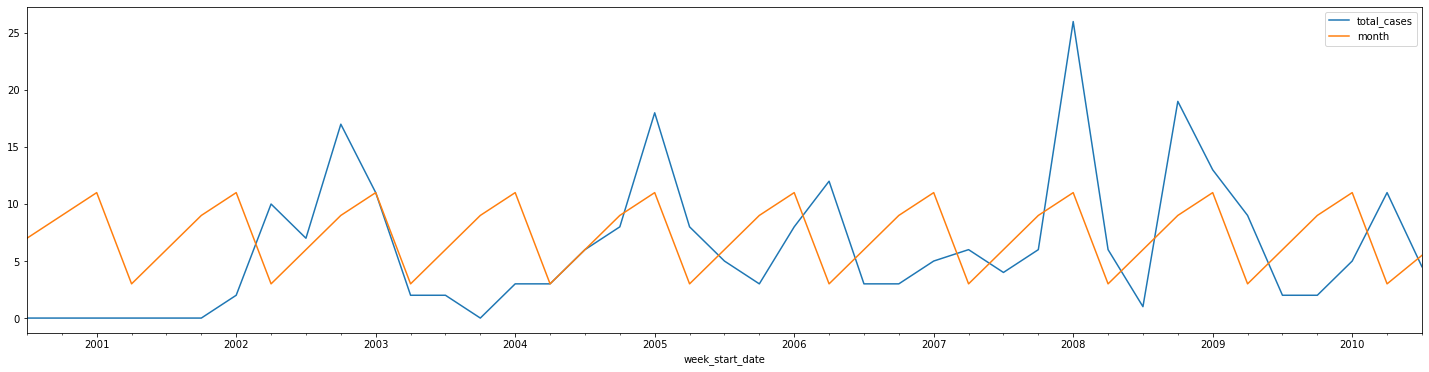

In [195]:
features[['total_cases','month']].resample("3m").median().plot(figsize=(25,6));

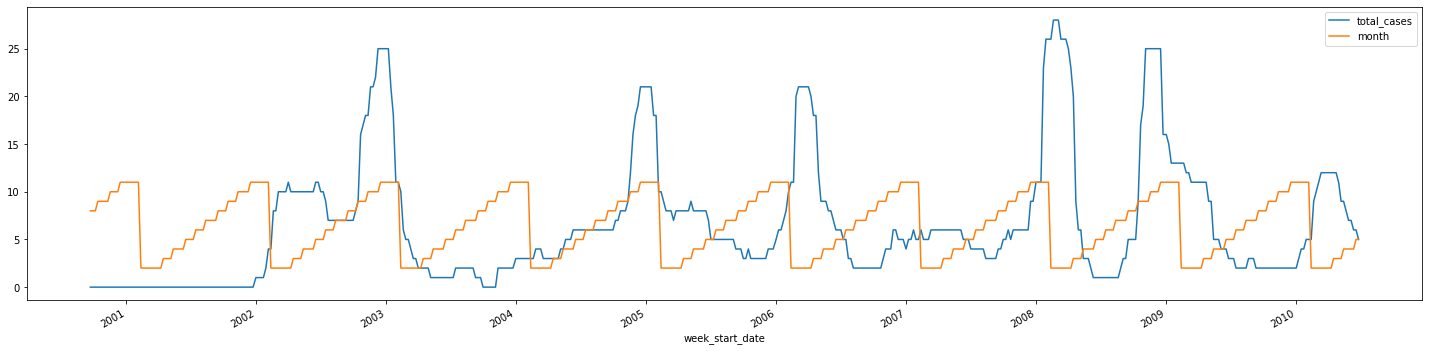

In [196]:
features[['total_cases','month']].rolling(13).median().plot(figsize=(25,6));

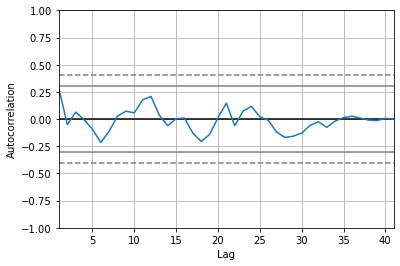

In [208]:
pd.plotting.autocorrelation_plot(features[['total_cases']].resample("3m").median());